# [DeepSeek LLM: Scaling Open-Source Language Models with Longtermism](https://arxiv.org/abs/2401.02954)

**Abstract**  
<!-- The rapid development of open-source large language models (LLMs) has been truly remarkable. However, the scaling law described in previous literature presents varying conclusions, which casts a dark cloud over scaling LLMs. We delve into the study of scaling laws and present our distinctive findings that facilitate scaling of large scale models in two commonly used open-source configurations, 7B and 67B. Guided by the scaling laws, we introduce DeepSeek LLM, a project dedicated to advancing open-source language models with a long-term perspective. To support the pre-training phase, we have developed a dataset that currently consists of 2 trillion tokens and is continuously expanding. We further conduct supervised fine-tuning (SFT) and Direct Preference Optimization (DPO) on DeepSeek LLM Base models, resulting in the creation of DeepSeek Chat models. Our evaluation results demonstrate that DeepSeek LLM 67B surpasses LLaMA-2 70B on various benchmarks, particularly in the domains of code, mathematics, and reasoning. Furthermore, open-ended evaluations reveal that DeepSeek LLM 67B Chat exhibits superior performance compared to GPT-3.5. -->

开源大型语言模型 (LLMs) 的快速发展确实令人瞩目。然而, 先前文献中描述的 scaling law 得出的结论各不相同, 这给扩展 LLM 蒙上了一层阴影。我们深入研究了 scaling law, 并提出了我们独特的发现, 这些发现有助于在两种常用的开源配置 7B 和 67B 中扩展大规模模型。在 scaling law 的指导下, 我们提出了 DeepSeek LLM, 一个旨在从长远的角度推动开源语言模型的项目。为了支持预训练阶段, 我们开发了一个数据集, 该数据集目前包含 2 万亿个 token, 并且还在不断扩展。我们进一步对 DeepSeek LLM Base 模型进行监督微调 (SFT) 和 Direct Preference Optimization (DPO), 从而创建了 DeepSeek Chat 模型。我们的评估结果表明, DeepSeek LLM 67B 在多个基准测试中都超越了 LLaMA-2 70B, 特别是在编程、数学和推理领域。此外, 开放式评估表明, DeepSeek LLM 67B Chat 的表现优于 GPT-3.5。

## Introduction
<!-- Over the past few years, Large Language Models (LLMs) based on decoder-only Transformers (Vaswani et al., 2017) have increasingly become the cornerstone and pathway to achieving Artificial General Intelligence (AGI). By predicting the next word in continuous text, LLMs undergo self-supervised pre-training on massive datasets, enabling them to achieve various purposes and possess many abilities, such as novel creation, text summarization, code completion, and more. Subsequent developments like supervised fine-tuning and reward modeling have enabled Large Language Models (LLMs) to better follow user intentions and instructions. This has endowed them with more versatile conversational capabilities and rapidly expanded their influence. -->

在过去几年中, 基于仅支持解码器的 Transformer (Vaswani et al., 2017) 的大型语言模型 (LLMs) 越来越成为实现人工通用智能 (AGI) 的基石和途径。通过预测连续文本中的下一个单词, LLMs 在海量数据集上进行自监督的预训练, 使其能够实现多种目的并具备多种能力, 例如小说创作、文本摘要、代码补全等。监督微调、奖励模型等后续发展使得大语言模型能够更好地遵循用户的意图和指令。这赋予了它们更灵活的对话能力, 并迅速扩大了它们的影响力。

<!-- This wave is sparked with closed products , such as ChatGPT (OpenAI, 2022), Claude (Anthropic, 2023), and Bard (Google, 2023), which are developed with extensive computational resources and substantial annotation costs. These products have significantly raised the community’s expectations for the capabilities of open-source LLMs, consequently inspiring a series of work (Bai et al., 2023; Du et al., 2022; Jiang et al., 2023; Touvron et al., 2023a,b; Yang et al., 2023). Among these, the LLaMA series models (Touvron et al., 2023a,b) stand out. It consolidates a range of works to create an efficient and stable architecture, building well-performing models ranging from 7B to 70B parameters. Consequently, the LLaMA series has become the de facto benchmark for architecture and performance among open-source models. -->

这波浪潮是由一些封闭产品引发的, 例如 ChatGPT (OpenAI, 2022), Claude (Anthropic, 2023) 和 Bard (Google, 2023), 这些产品的开发需要大量计算资源和大量标注成本。这些产品大大提高了社区对开源 LLMs 功能的期望, 进而激发了一系列工作 (Bai et al., 2023; Du et al., 2022; Jiang et al., 2023; Touvron et al., 2023a,b; Yang et al., 2023)。其中, LLaMA 系列模型 (Touvron et al., 2023a,b) 脱颖而出。它整合了一系列工作, 创建了高效且稳定的架构, 构建了从 7B 到 70B 参数的高性能模型。因此, LLaMA 系列已成为开源模型中架构和性能的事实基准。

<!-- Following LLaMA, the open-source community has primarily focused on training fixed-size (7B, 13B, 34B, and 70B), high-quality models, often neglecting research exploration into LLM scaling laws (Hoffmann et al., 2022; Kaplan et al., 2020). Nonetheless, research on scaling laws is of utmost importance, considering that the current open-source models are merely at the initial stage of Artificial General Intelligence (AGI) development. In addition, early works (Hoffmann et al., 2022; Kaplan et al., 2020) reached varying conclusions on the scaling of model and data with increased compute budgets and inadequately addressed hyperparameter discussions. In this paper, we extensively investigate the scaling behavior of language models and apply our findings in two widely used large-scale model configurations, namely 7B and 67B. Our study aims to lay the groundwork for future scaling of open-source LLMs, paving the way for further advancements in this domain. Specifically, we first examined the scaling laws of batch size and learning rate, and found their trends with model size. Building on this, we conducted a comprehensive study of the scaling laws of the data and model scale, successfully revealing the optimal model/data scaling-up allocation strategy and predicting the expected performance of our large-scale models. Additionally, during development, we discovered that the scaling laws derived from different datasets show significant differences. This suggests that choice of dataset remarkably affects the scaling behavior, indicating that caution should be exercised when generalizing scaling laws across datasets. -->

继 LLaMA 之后, 开源社区主要专注于训练固定大小 (7B、13B、34B 和 70B) 的高质量模型, 往往忽视了对 LLM scaling laws 的研究探索 (Hoffmann et al., 2022; Kaplan et al., 2020)。尽管如此, 考虑到当前的开源模型仅处于通用人工智能 (AGI) 发展的初始阶段, 对 scaling laws 的研究至关重要。此外, 早期的研究 (Hoffmann et al., 2022; Kaplan et al., 2020) 在计算预算增加的情况下对模型和数据的扩展得出了不同的结论, 并且对超参数的讨论不够充分。在本文中, 我们广泛研究了语言模型的 scaling behavior, 并将我们的发现应用于两种广泛使用的大规模模型配置, 即 7B 和 67B。我们的研究旨在为开源 LLMs 的未来 scaling 奠定基础, 为该领域的进一步发展铺平道路。具体来说, 我们首先研究了 batch size 和 learning rate 的 scaling laws, 并发现它们随模型大小的变化趋势。在此基础上, 我们对数据和模型规模的 scaling laws 进行了全面研究, 成功揭示了最优的模型/数据 scaling-up 分配策略, 并预测了我们大规模模型的预期性能。此外, 在开发过程中, 我们发现从不同数据集得出的 scaling laws 存在显著差异。这表明数据集的选择会显著影响 scaling behavior, 表明在跨数据集推广 scaling laws 时应谨慎行事。

<!-- Under the guidance of our scaling laws, we build from scratch open-source large language models, and release as much information as possible for community reference. We collect 2 trillion tokens for pre-training, primarily in Chinese and English. At the model level, we generally followed the architecture of LLaMA, but replaced the cosine learning rate scheduler with a multi-step learning rate scheduler, maintaining performance while facilitating continual training. We collected over 1 million instances for supervised fine-tuning (SFT) (Ouyang et al., 2022) from diverse sources. This paper shares our experiences with different SFT strategies and findings in data ablation techniques. Additionally, we have utilized direct preference optimization (DPO) (Rafailov et al., 2023) to improve the conversational performance of the model. -->

在我们的 scaling laws 指导下, 我们从零开始构建开源大语言模型, 并发布尽可能多的信息供社区参考。我们收集了 2 万亿个 token 用于预训练, 主要使用中文和英文。<font color="red">在模型层面, 我们总体上遵循了 LLaMA 的架构, 但将余弦学习率调度器替换为**多步学习率调度器**</font>, 在保持性能的同时便于持续训练。我们从各种来源收集了超过 100 万个用于监督微调 (SFT) (Ouyang et al., 2022) 的实例。本文分享了我们使用不同 SFT 策略的经验, 以及数据消融技术中的发现。此外, 我们利用utilized direct preference optimization (DPO) (Rafailov et al., 2023), 提高模型的对话性能。

<!-- We conduct extensive evaluations using our base and chat models. The evaluation results demonstrate that DeepSeek LLM surpasses LLaMA-2 70B across various benchmarks, particularly in the fields of code, mathematics, and reasoning. Following SFT and DPO, the DeepSeek 67B chat model outperforms GPT-3.5 in both Chinese and English open-ended evaluations. This highlights the superior performance of DeepSeek 67B in generating high-quality responses and engaging in meaningful conversations in both languages. Furthermore, the safety evaluation indicates that DeepSeek 67B Chat can provide harmless responses in practice. -->

我们对基础模型和聊天模型进行了广泛评估。评估结果表明, DeepSeek LLM 在多个基准测试中都超越了 LLaMA-2 70B, 特别是在编程、数学和推理领域。经过 SFT 和 DPO 之后, DeepSeek 67B 聊天模型在中文和英文开放式评估中均优于 GPT-3.5。这突显了 DeepSeek 67B 在生成高质量响应和以两种语言进行有意义的对话方面的卓越表现。此外, 安全性评估表明 DeepSeek 67B Chat 在实际应用中能够提供无害的响应。

<!-- In the rest of this paper, we first introduce our pre-training basic concepts of DeepSeekeLLM in Section [2](#Pre-Training), including the composition of data, model architecture, infrastructure, and hyperparameters. In Section [3](#Scaling-Laws), we provide a detailed explanation of the scaling laws we have discovered and its implications. Additionally, we discuss the rationale behind our selection of pre-training hyperparameters, taking into account the insights gained from the scaling laws analysis. In Section [4](#Alignment), we discuss our fine-tuning methodology, encompassing the composition of fine-tuning data and specific methods during the SFT and DPO stages. We then present the detailed evaluation results of DeepSeek LLM in Section [5](#Evaluation), covering both the base and chat models, as well as their performance in open-ended evaluations and safety evaluations. Finally, we discuss the current limitations and future directions of DeepSeek LLM in Section [6](#Conclusion,-Limitation,-and-FutureWork). -->

在本文的剩余部分, 我们首先在第 [2](#Pre-Training) 节中介绍我们的 DeepSeekeLLM 的预训练基本概念, 包括数据结构、模型架构、基础设施和超参数。在第 [3](#Scaling-Laws) 节中, 我们详细解释了我们发现的 scaling laws 及其含义。此外, 我们考虑从 scaling laws 分析中获得的见解, 讨论了预训练超参数选择的背后理由。在第 [4](#Alignment) 节中, 我们讨论了我们的微调方法, 包括微调数据的组成以及 SFT 和 DPO 阶段的具体方法。然后, 我们在第 [5](#Evaluation) 节中介绍了 DeepSeek LLM 的详细评估结果, 涵盖基础模型和聊天模型, 以及它们在开放式评估和安全评估中的表现。最后, 我们在第 [6](#Conclusion,-Limitation,-and-FutureWork) 节中讨论了 DeepSeek LLM 的当前局限性和未来方向。

## Pre-Training
### Data
<!-- Our main objective is to comprehensively enhance the richness and diversity of the dataset. We have gained valuable insights from reputable sources such as (Computer, 2023; Gao et al., 2020; Penedo et al., 2023; Touvron et al., 2023a). To achieve these goals, we have organized our approach into three essential stages: deduplication, filtering, and remixing. The deduplication and remixing stages ensure a diverse representation of the data by sampling unique instances. The filtering stage enhances the density of information, thereby enabling more efficient and effective model training. -->

我们的主要目标是全面增强数据集的丰富性和多样性。我们从一些权威来源获得了宝贵的见解, 例如 Computer, 2023; Gao et al., 2020; Penedo et al., 2023; Touvron et al., 2023a。为了实现这些目标, 我们将方法组织为三个关键阶段: 去重、过滤和重新混合。去重和重新混合阶段通过抽样唯一实例, 确保数据的多样化表示。过滤阶段增强信息密度, 从而实现更高效、更有效的模型训练。

<!-- We adopted an aggressive deduplication strategy, expanding the deduplication scope. Our analysis revealed that deduplicating the entire Common Crawl corpus results in higher removal of duplicate instances compared to deduplicating within a single dump. Table 1 illustrates that deduplicating across 91 dumps eliminates four times more documents than a single dump method. -->

我们采用了一种激进的去重策略, 扩大了去重范围。我们的分析表明, 对整个 Common Crawl 语料库进行去重, 与对单个 dump 进行去重相比, 能够去除更多的重复实例。表 1 表明, 对 91 个 dumps 进行去重, 比单个 dump 方法, 多消除四倍的文档。

| Dumps Used | 1 | 2 | 6 | 12 | 16 | 22 | 41 | 91 |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| Deduplication Rate (%) | 22.2 | 46.7 | 55.7 | 69.9 | 75.7 | 76.3 | 81.6 | 89.8 |
<!-- Table 1 Deduplication ratios for various Common Crawl dumps. -->
表 1. 不同 Common Crawl dumps 的去重率。

<!-- In the filtering stage, we focus on developing robust criteria for document quality assessment. This involves a detailed analysis incorporating both linguistic and semantic evaluations, providing a view of data quality from individual and global perspectives. In the remixing phase, we adjust our approach to address data imbalances, focusing on increasing the presence of underrepresented domains. This adjustment aims to achieve a more balanced and inclusive dataset, ensuring that diverse perspectives and information are adequately represented. -->

在过滤阶段, 我们专注于制定鲁棒的文档质量评估准则。这涉及结合语言和语义评估的详细分析, 从个体和全局角度提供数据质量视图。在重新混合阶段, 我们调整方法以解决数据不平衡问题, 重点增加代表性不足领域的存在。这一调整旨在实现一个更加平衡和包容的数据集, 确保多样化的观点和信息得到充分表示。

<!-- For our tokenizer, we implemented the Byte-level Byte-Pair Encoding (BBPE) algorithm based on the tokenizers library (Huggingface Team, 2019). Pre-tokenization was employed to prevent the merging of tokens from different character categories such as new lines, punctuation, and Chinese-Japanese-Korean (CJK) symbols, similar to GPT-2 (Radford et al., 2019). We also chose to split numbers into individual digits following the approach used in (Touvron et al., 2023a,b). Based on our prior experience, we set the number of conventional tokens in the vocabulary at 100000. The tokenizer was trained on a multilingual corpus of approximately 24 GB, and we augmented the final vocabulary with 15 special tokens, bringing the total size to 100015. To ensure computational efficiency during training and to reserve space for any additional special tokens that might be needed in the future, we configured the model’s vocabulary size to 102400 for training. -->

对于我们的分词器, 我们基于 tokenizers 库 (Huggingface Team, 2019) 实现了 Byte-level Byte-Pair Encoding (BBPE) 算法。采用预分词, 以防止来自不同字符类别的 tokens 合并, 如换行符、标点符号和中日韩(CJK)符号, 这与 GPT-2 的方法相似 (Radford et al., 2019)。我们还选择遵循 (Touvron et al., 2023a,b) 中使用的方法, 将数字拆分为单个数字。根据我们之前的经验, 我们将词汇表中常规 tokens 数量设置为 100000。分词器在约 24 GB 的多语言语料库上进行训练, 我们用 15 个特殊 tokens 扩展最终的词汇表, 使总大小达到 100015。为了确保训练期间中的计算效率, 并为未来可能需要的任何额外特殊 tokens 预留空间, 我们将模型的词汇表大小配置为 102400 以进行训练。

### Architecture

<!-- The micro design of DeepSeek LLM largely follows the design of LLaMA (Touvron et al., 2023a,b), adopting a Pre-Norm structure with RMSNorm (Zhang and Sennrich, 2019) function and using SwiGLU (Shazeer, 2020) as the activation function for the Feed-Forward Network (FFN), with an intermediate layer dimension of $\frac{8}{3}𝑑_\text{𝑚𝑜𝑑𝑒𝑙}$. It also incorporates Rotary Embedding (Su et al., 2024) for positional encoding. To optimize inference cost, the 67B model uses Grouped-Query Attention (GQA) (Ainslie et al., 2023) instead of the traditional Multi-Head Attention (MHA). -->

DeepSeek LLM 的微观设计主要<font color="red">**遵循 LLaMA (Touvron et al., 2023a,b)**</font> 的设计, 采用<font color="red">**带有 RMSNorm (Zhang and Sennrich, 2019) 函数的 Pre-Norm 结构**</font>, 并<font color="red">**使用 SwiGLU (Shazeer, 2020) 作为前馈网络 (FFN) 的激活函数**</font>, 中间层维度为 $\frac{8}{3}𝑑_\text{𝑚𝑜𝑑𝑒𝑙}$。它还<font color="red">**引入 Rotary Embedding (Su et al., 2024) 用于位置编码**</font>。为了优化推理成本, 67B 模型<font color="red">**使用 Grouped-Query Attention (GQA) (Ainslie et al., 2023)**</font> 代替传统的 Multi-Head Attention (MHA)。

<!-- However, in terms of macro design, DeepSeek LLM differs slightly. Specifically, DeepSeek LLM 7B is a 30-layer network, while DeepSeek LLM 67B has 95 layers. These layer adjustments, while maintaining parameter consistency with other open-source models, also facilitate model pipeline partitioning to optimize training and inference. -->

但在宏观设计方面, DeepSeek LLM 有些不同。具体来说, DeepSeek LLM 7B 是一个 30 层网络, 而 DeepSeek LLM 67B 则为 95 层。这些层数的调整, 在保持与其他开源模型参数一致的同时, 也有利于模型流水线划分, 从而优化训练和推理。

<!-- Unlike most works using Grouped-Query Attention (GQA), we expanded the 67B model’s parameters in network depth rather than the common practice of widening the intermediate width of FFN layers, aiming for better performance. Detailed network specifications can be found in Table 2. -->

与大多数使用 Grouped-Query Attention (GQA) 的工作不同, <font color="red">我们在网络深度上扩展了 67B 模型的参数, 而不是像通常那样加宽 FFN 层的中间宽度</font>, 以期获得更好的性能。详细的网络规格可在表 2 中找到。

| Params | $𝑛_\text{layers}$ | $𝑑_\text{model}$ | $𝑛_\text{heads}$ | $𝑛_\text{kv\_heads}$ | Context Length | Sequence Batch Size | Learning Rate | Tokens |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 7B | 30 | 4096 | 32 | 32 | 4096 | 2304 | 4.2e-4 | 2.0T |
| 67B | 95 | 8192 | 64 | 8 | 4096 | 4608 | 3.2e-4 | 2.0T |

<!-- Table 2. Detailed specs of DeepSeek LLM family of models. We choose the hyper-parameters based on our findings in Section [3](#Scaling-Laws) -->

表 2. DeepSeek LLM 系列模型的详细规格。我们基于在第 [3](#Scaling-Laws) 节中的发现选择超参数。

### Hyperparameters
<!-- DeepSeek LLM is initialized with a standard deviation of 0.006 and trained using the AdamW optimizer (Loshchilov and Hutter, 2017), with the following hyperparameters: $\beta_1=0.9$, $\beta_2=0.95$, and $\text{weight\_decay} =0.1$. -->

DeepSeek LLM 以 0.006 的标准差初始化, 并使用 AdamW 优化器 (Loshchilov and Hutter, 2017) 进行训练, 其超参数如下s: $\beta_1=0.9$, $\beta_2=0.95$ 及 $\text{weight\_decay} =0.1$。

<!-- A multi-step learning rate scheduler is employed during pre-training instead of the typical cosine scheduler. Specifically, the learning rate of the model reaches its maximum value after 2000 warmup steps, and then decreases to 31.6% of the maximum value after processing 80% of the training tokens. It further reduces to 10% of the maximum value after 90% of the tokens. The gradient clipping during the training phase is set to 1.0. -->

在预训练阶段, <font color="red">采用多步学习率调度器, 而非典型的余弦调度器</font>。具体来说, 模型的学习率在 2000 个预热步后达到最大值, 在处理完 80% 的训练 tokens 后, 降至最大值的 31.6%。在处理完 90% 的 token 后, 学习率进一步降至最大值的 10%。训练阶段的梯度裁剪设置为 1.0。

<!-- Based on our empirical findings, we observed that despite differences in the loss reduction trend during training, the final performance using a multi-step learning rate scheduler is essentially consistent with that of a cosine scheduler, as shown in Figure 1(a). When adjusting the training scale while keeping the model size fixed, the multi-step learning rate scheduler allows for the reuse of training from the first phase, offering a unique convenience for continual training. Therefore, we chose the multi-step learning rate scheduler as our default setting. We also demonstrate in Figure 1(b) that adjusting the proportions of different stages in the multi-step learning rate scheduler can yield slightly better performance. However, for the sake of balancing reuse ratios in continual training and model performance, we opted for the aforementioned distribution of 80%, 10%, and 10% for the three stages respectively. -->

基于我们的实证研究, 我们观察到尽管训练过程中loss降低的趋势不同, 但使用多步学习率调度器的最终表现与余弦调度器基本一致, 如图 1(a) 所示。在保持模型规模不变的情况下调整训练规模时, 多步学习率调度器允许复用第一阶段的训练, 为持续训练提供独特的便利性。因此我们选择多步学习率调度器作为默认设置。我们还在图 1(b) 中展示了调整多步学习率调度器中不同阶段的比例可以获得稍微更好的性能。然而, 为了平衡持续训练的复用率和模型性能, 我们选择了前面提到的三个阶段分别 80%、10%、10% 的分布。

<!-- The batch size and learning rate vary with the model size. Specific parameters for the pre-training phases of the 7B and 67B models can be found in Table 2. -->

批量大小和学习率随模型大小而变化。7B 和 67B 模型预训练阶段的具体参数见表 2。

### Infrastructures
<!-- We use an efficient and light-weight training framework named HAI-LLM (High-flyer, 2023) to train and evaluate large language models. Data parallelism, tensor parallelism, sequence parallelism, and 1F1B pipeline parallelism are integrated into this framework as done in Megatron (Korthikanti et al., 2023; Narayanan et al., 2021; Shoeybi et al., 2019). We also leverage the flash attention (Dao, 2023; Dao et al., 2022) technique to improve hardware utilization. ZeRO-1 (Rajbhandari et al., 2020) is exploited to partition optimizer states over data parallel ranks. Efforts are also made to overlap computation and communication to minimize additional waiting overhead, including the backward procedure of the last micro-batch and reduce-scatter operation in ZeRO-1, and GEMM computation and all-gather/reduce-scatter in sequence parallel. Some layers/operators are fused to speed up training, including LayerNorm, GEMM whenever possible, and Adam updates. To improve model training stability, we train the model in bf16 precision but accumulate gradients in fp32 precision. In-place cross-entropy is performed to reduce GPU memory consumption, i.e.: we convert bf16 logits to fp32 precision on the fly in the cross-entropy CUDA kernel (instead of converting it beforehand in HBM), calculate the corresponding bf16 gradient, and overwrite logits with its gradient. -->

我们使用一个高效且轻量的<font color="red">训练框架 HAI-LLM (High-flyer, 2023)</font> 来训练和评估大语言模型。数据并行、张量并行、序列并行和 1F1B 流水线并行都集成到该框架中, 就像 Megatron (Korthikanti et al., 2023; Narayanan et al., 2021; Shoeybi et al., 2019) 中所做的那样。我们还利用 flash attention (Dao, 2023; Dao et al., 2022) 技术, 提高硬件利用率。ZeRO-1 (Rajbhandari et al., 2020) 被用于在数据并行 ranks 之间划分优化器状态。我们还努力 overlap 计算和通信, 以最小化额外的等待开销, 包括 ZeRO-1 中最后一个 micro-batch 的反向过程和 reduce-scatter 操作, 以及序列并行中的 GEMM 计算和 all-gather/reduce-scatter。为加速训练, 融合了一些层/操作, 包括 LayerNorm、尽可能的 GEMM 和 Adam 更新。为了提高模型训练的稳定性, 我们以 bf16 精度训练模型, 但以 fp32 精度累积梯度。执行 in-place 交叉熵以减少 GPU 内存消耗, 即: 我们在交叉熵 CUDA 内核中动态将 bf16 logits 转换为 fp32 精度 (而不是在 HBM 中提前转换), 计算相应的 bf16 梯度, 并用其梯度覆盖 logits。

<!-- Model weights and optimizer states are saved every 5 minutes asynchronously, which means we will lose no more than 5 minutes of training in the worst case of occasional hardware or network failures. These temporary model checkpoints are cleared up regularly to avoid consuming too much storage space. We also support resuming training from a different 3D parallel configuration to cope with dynamic changes in computing cluster load. -->

模型权重和优化器状态每 5 分钟异步保存一次, 这意味着在偶尔发生硬件或网络故障的最坏情况下, 我们只会损失不超过 5 分钟的训练时间。这些临时模型检查点会定期清除, 以避免占用过多的存储空间。我们还支持从一个不同的 3D 并行配置恢复训练, 以应对计算集群负载的动态变化。

<!-- As for evaluation, we employ vLLM (Kwon et al., 2023) in generative tasks, and continuous batching in non-generative tasks to avoid manual batch size tuning and reduce token padding. -->

在评估方面, 我们在生成任务中采用 vLLM (Kwon et al., 2023), 在非生成任务中采用连续批处理, 以避免手动调整批量大小并减少词元填充。

## Scaling Laws
<!-- Research on scaling laws (Hestness et al., 2017) predates the emergence of large language models. Scaling laws (Henighan et al., 2020; Hoffmann et al., 2022; Kaplan et al., 2020) suggest that model performance can be predictably improved with increases in compute budget $𝐶$, model scale $𝑁$, and data scale $𝐷$. When model scale $𝑁$ is represented by model parameters and data scale $𝐷$ by the number of tokens, $𝐶$ can be approximated as $𝐶=6𝑁𝐷$. Therefore, how to optimize the allocation between model and data scales when increasing the compute budget is also a crucial research objective in scaling laws. -->

scaling laws (Hestness et al., 2017) 的研究早于大语言模型的出现。Scaling laws (Henighan et al., 2020; Hoffmann et al., 2022; Kaplan et al., 2020) 表明, 随着计算预算 $𝐶$、模型规模 $𝑁$ 和数据规模 $𝐷$ 的增加, 模型性能可以得到可预测的改善。当模型规模 $𝑁$ 由模型参数表示, 数据规模 $𝐷$ 由 tokens 数量表示时, $𝐶$ 可以近似为 $𝐶=6𝑁𝐷$。因此, 在增加计算预算时, 如何优化模型和数据规模之间的分配也是 scaling laws 的一个重要研究目标。

<!-- The development of LLMs (Dai et al., 2019; Radford et al., 2019), with larger models achieving unexpected and significant performance improvements, has brought scaling laws research to a new peak. Results in scaling laws demonstrate that expanding the compute budget continues to yield significant benefits, which further encourages the increase in model scales (Brown et al., 2020; Smith et al., 2022). -->

随着更大的模型实现意想不到的显著性能提升, LLMs 的发展 (Dai et al., 2019; Radford et al., 2019) 将 scaling laws 研究推向新的高峰。scaling laws 的结果表明, 扩大计算预算仍然能产生显著收益, 这进一步推动了模型规模的增加 (Brown et al., 2020; Smith et al., 2022)。

<!-- However, as shown in Table 4, early works (Hoffmann et al., 2022; Kaplan et al., 2020) on the optimal model/data scaling-up allocation strategy have shown varying conclusions, raising doubts about the general applicability of scaling laws. Moreover, these studies often lacked a complete description of hyperparameter settings, leaving it uncertain whether models under different compute budgets reached optimal performance. Therefore, we revisit scaling laws in this section to address these uncertainties and ensure we are on the right path to efficiently scale-up compute, which reflects the long-term perspective and is key to developing continuously improving models. -->

然而, 如表 4 所示, 早期关于最优模型/数据 scaling-up 分配策略的研究 (Hoffmann et al., 2022; Kaplan et al., 2020) 得出了不同的结论, 这引发了对 scaling laws 普遍适用性的质疑。此外, 这些研究通常缺乏对超参数配置的完整描述, 因此无法确定不同计算预算下的模型是否达到最优性能。因此, 我们在本节中重新审视 scaling laws, 以解决这些不确定性, 并确保我们在高效 scale-up 计算方面走在正确的道路上, 这反映了长期视角, 也是开发持续改进模型的关键。

<!-- To ensure that models under different compute budgets can achieve optimal performance, we first studied the scaling laws of hyperparameters. Empirically, it has been observed that the optimal values of most parameters during training do not change when varying compute budgets. Therefore, these parameters are consistent with those outlined in Section [2.3](#Hyperparameters) and remain unchanged across different compute budgets. However, the hyperparameters that have the most significant impact on performance, namely batch size and learning rate, were re-examined. -->

为了确保不同计算预算下的模型都能达到最优性能, 我们首先研究了超参数的 scaling laws。实证研究表明, 训练过程中大多数参数的最优值不会随着计算预算的变化而变化。因此, 这些参数与第 [2.3](#Hyperparameters) 节中列出的参数一致, 并且在不同计算预算下保持不变。然而, 对性能影响最大的超参数, 即批量大小和学习率, 被重新审视。

<!-- Early works (Goyal et al., 2017; McCandlish et al., 2018; Shallue et al., 2019; Smith et al., 2017; Zhang et al., 2019) provided some empirical observations for setting batch size and learning rate, but we found these observations have limited applicability in our preliminary experiments. Through extensive experiments, we modeled the power law relationship between the compute budget $𝐶$ and the optimal batch size and learning rate. This relationship, which we refer to as the scaling laws of hyperparameters, provides an empirical framework for determining the optimal hyperparameters. This methodology ensures that models across different compute budgets can reach their near-optimal performance. -->

早期的研究 (Goyal et al., 2017; McCandlish et al., 2018; Shallue et al., 2019; Smith et al., 2017; Zhang et al., 2019) 为设置批量大小和学习率提供了一些经验观察, 但我们发现这些观察在我们的初步实验中适用性有限。通过大量实验, 我们建模了计算预算 $𝐶$ 与最优批量大小和学习率之间的幂律关系。这种关系, 我们称之为超参数的 scaling laws, 为确定最优超参数提供了一个经验框架。这种方法确保在不同计算预算下, 模型能够达到近似最优的性能。

<!-- We then study the scaling laws of the model and data scales. To reduce experimental costs and fitting difficulties, we adopted the IsoFLOP profile approach from Chinchilla (Hoffmann et al., 2022) to fit the scaling curve. To represent the model scale more accurately, we utilized a new model scale representation, non-embedding FLOPs/token $𝑀$, replacing the earlier-used model parameters $𝑁$, and substituted the approximate compute budget formula $𝐶=6𝑁𝐷$ with the more precise $𝐶=𝑀𝐷$. The experimental results provided insights into the optimal model/data scaling-up allocation strategy and performance predictions, and also accurately forecasted the expected performance of DeepSeek LLM 7B and 67B models. -->

接下来, 我们研究模型和数据规模的 scaling laws。为了降低实验成本和拟合难度, 我们采用了 Chinchilla (Hoffmann et al., 2022) 提出的 IsoFLOP 配置方法来拟合 scaling 曲线。为了更准确地表示模型规模, 我们使用了一种新的模型规模表示, 即非嵌入 FLOPs/token $𝑀$, 替代之前使用的模型参数 $𝑁$, 并用更精确的 $𝐶=𝑀𝐷$ 替代近似的计算预算公式 $𝐶=6𝑁𝐷$。实验结果为最优模型/数据 scaling-up 分配策略和性能预测提供了见解, 并准确预测了 DeepSeek LLM 7B 和 67B 模型的预期性能。

<!-- Additionally, in the process of exploring scaling laws, the data we used underwent multiple iterations, continually improving in quality. We attempted to fit the scaling curve on various datasets and found that the data quality significantly influences the optimal model/data scaling-up allocation strategy. The higher the data quality, the more the increased compute budget should be allocated to model scaling. This implies that high-quality data can drive the training of larger models given the same data scale. The differences in the optimal model/data scaling-up allocation strategy may also serve as an indirect approach to assess the quality of data. We will continue to pay close attention to the changes in data quality and its impact on scaling laws, and provide more analysis in future works. -->

此外, 在探索 scaling laws 的过程中, 我们使用的数据经历了多次迭代, 质量不断提高。我们尝试在各种数据集上拟合 scaling 曲线, 发现数据质量显著影响最优模型/数据 scaling-up 分配策略。数据质量越高, 增加的计算预算应更多地分配给模型 scaling。这意味着在给定相同数据规模的情况下, 高质量的数据可以推动更大模型的训练。最优模型/数据 scaling-up 分配策略的差异也可以作为评估数据质量的间接方法。我们将继续密切关注数据质量的变化及其对 scaling laws 的影响, 并在未来的工作中提供更多分析。

<!-- In summary, our contributions and findings in scaling laws can be summarized as follows:
- We established the scaling laws for hyperparameters, providing an empirical framework for determining the optimal hyperparameters.
- Instead of model parameters $𝑁$, we adopt non-embedding FLOPs/token $𝑀$ to represent the model scale, leading to a more accurate optimal model/data scaling-up allocation strategy and a better prediction of generalization loss for large-scale models.
- The quality of pre-training data impacts the optimal model/data scaling-up allocation strategy. The higher the data quality, the more the increased compute budget should be allocated to model scaling. -->

综上所述, 我们在 scaling laws 方面的贡献和发现可以总结如下:
- 我们建立了超参数的 scaling laws, 为确定最优超参数提供了经验框架。
- 我们采用非嵌入 FLOP/token $𝑀$ 代替模型参数 $𝑁$ 来表示模型规模, 从而得到更准确的最优模型/数据 scaling-up 分配策略, 和大规模模型的泛化损失的更好预测。
- 预训练数据的质量影响最优模型/数据 scaling-up 分配策略。数据质量越高, 增加的计算预算应更多地分配给模型 scaling。

### Scaling Laws for Hyperparameters
<!-- We initially conducted a grid search for batch size and learning rate on small-scale experiments with a compute budget of 1e17, and the results of a specific model size (177M FLOPs/token) are illustrated in Figure 2(a). The results demonstrate that the generalization error remains stable across a wide range of choices of batch sizes and learning rates. This indicates that near-optimal performance can be achieved within a relatively wide parameter space. -->

我们最初在计算预算为 1e17 的小规模实验中, 对批量大小和学习率进行网格搜索, 特定模型大小 (177M FLOPs/token) 的结果如图 2(a) 所示。结果表明, 在各种批量大小和学习率选择范围内, 泛化误差保持稳定。这表明在相对较宽的参数空间内, 可以实现近似最优性能。

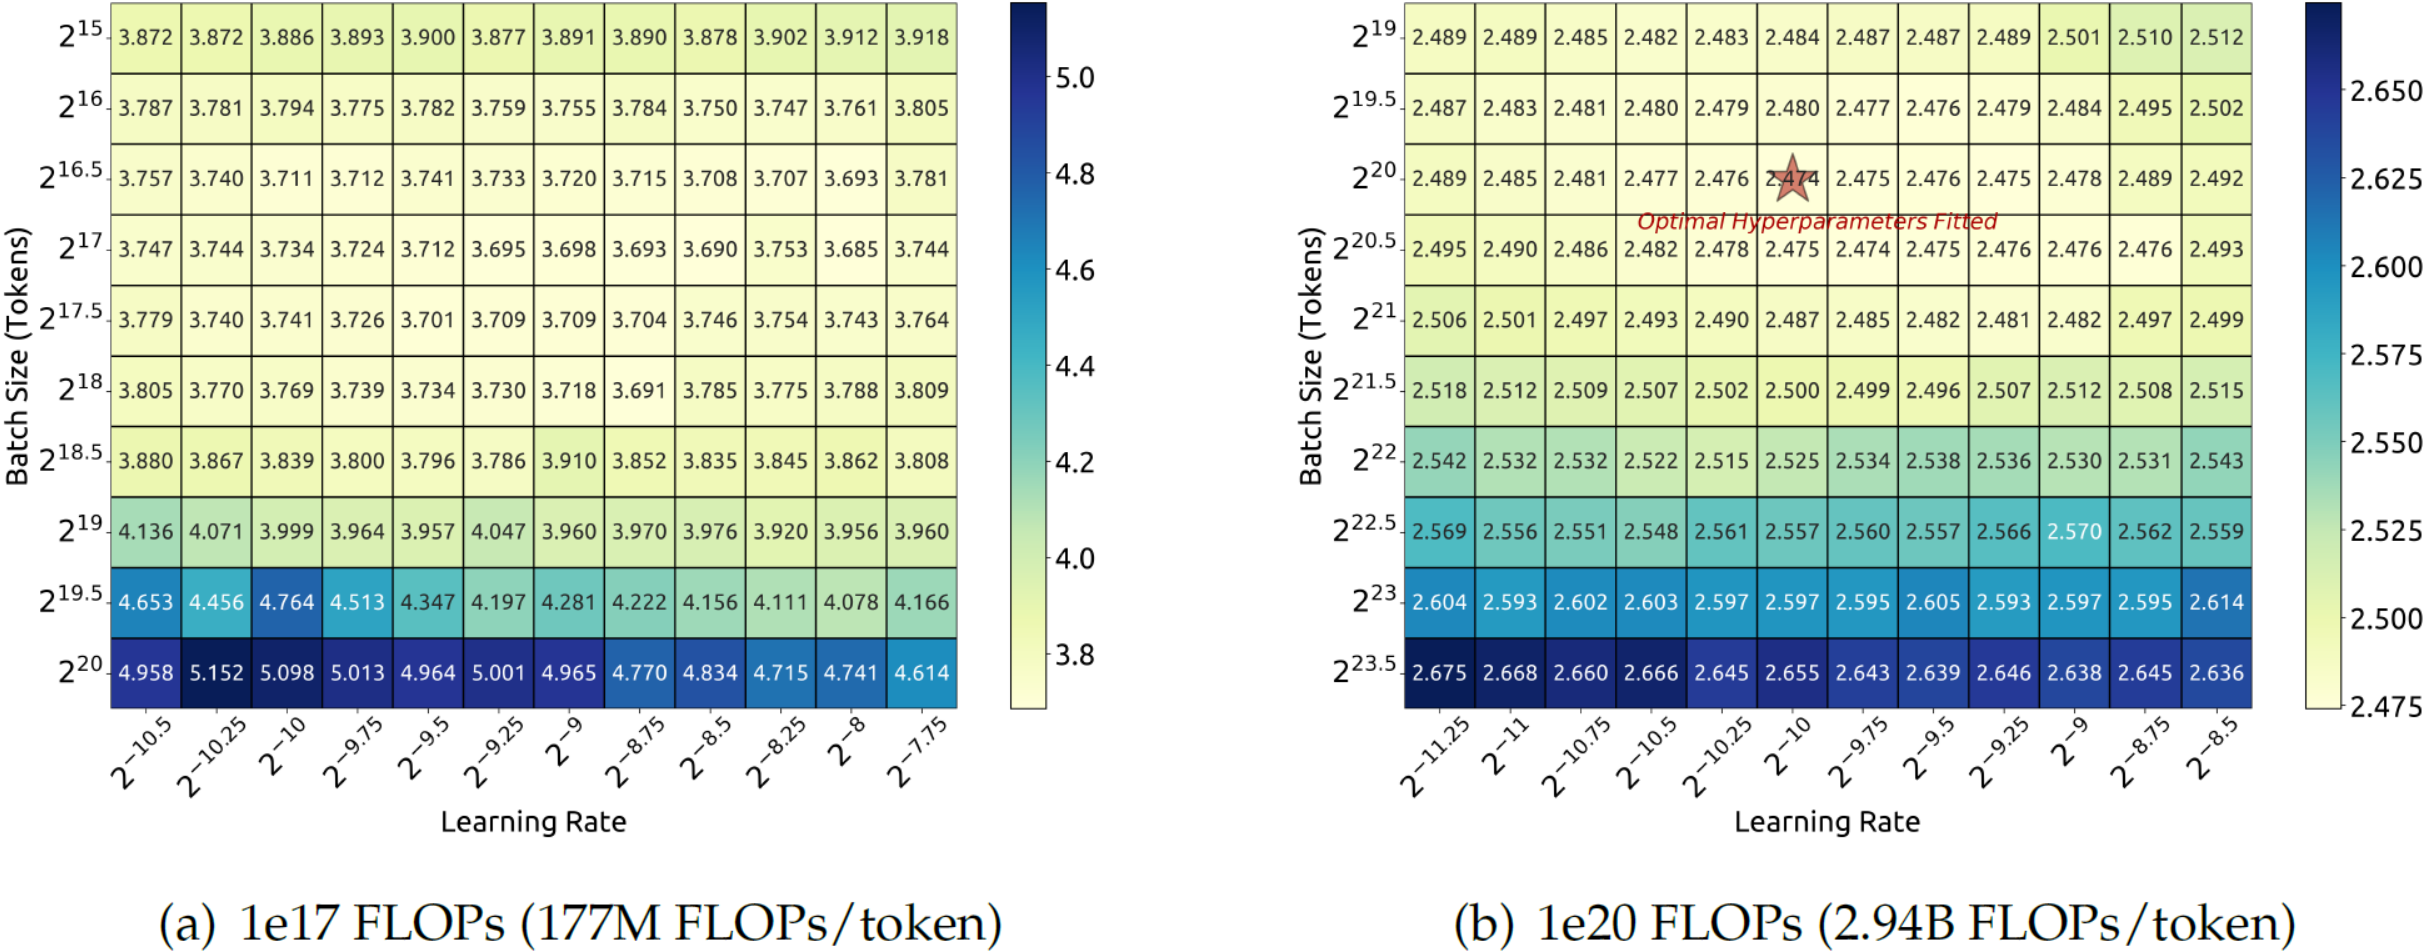

<!-- Figure 2|Training loss w.r.t. batch size and learning rate with 1e17 and 1e20 FLOP -->

图 2. 1e17 和 1e20 FLOP 下, 训练损失 w.r.t. 批量大小和学习率

<!-- Then, we utilized the aforementioned multi-step learning rate scheduler to effectively train multiple models with different batch sizes, learning rates, and compute budgets ranging from 1e17 to 2e19 by reusing the first stage. Considering the redundancy in the parameter space, we regarded the parameters used by models whose generalization error exceeded the minimum by no more than 0.25% as near-optimal hyperparameters. We then fitted the batch size $𝐵$ and learning rate $\eta$ with respect to the compute budget $𝐶$. The fitting results, as shown in Figure 3, reveal that the optimal batch size $𝐵$ gradually increases with the increase in compute budget $𝐶$, while the optimal learning rate $\eta$ gradually decreases. This is in line with the intuitive empirical settings for batch size and learning rate when scaling up models. Moreover, all near-optimal hyperparameters fall within a broad band range, indicating that it is relatively easy to choose near-optimal parameters within this interval. The final formulae we fitted for batch size and learning rate are as follows: -->

然后, 我们利用前面提到的多步学习率调度器, 通过复用第一阶段, 有效地训练了具有不同批量大小、学习率和计算预算(范围从 1e17 到 2e19)的多个模型。考虑到参数空间中的冗余, 我们将泛化误差超过最小值不超过 0.25% 的模型所使用的参数视为近似最优超参数。然后, 我们根据计算预算 $𝐶$ 拟合批量大小 $𝐵$ 和学习率 $\eta$。拟合结果如图 3 所示, 表示随着计算预算 $𝐶$ 的增加, 最优批量大小 $𝐵$ 逐渐增加, 而最优学习率 $\eta$ 逐渐减小。这与在 scaling up 模型时对批量大小和学习率的直观经验配置一致。此外, 所有近似最优超参数都落在一个较宽的范围内, 表明在此区间内选择近似最优参数相对容易。我们拟合的最终批量大小和学习率公式如下:

$$\begin{align} \eta_{opt} &= 0.3118 \cdot 𝐶^{−0.1250} \\
B_{opt} &= 0.2920 \cdot 𝐶^{0.3271} \end{align} \tag{1}$$

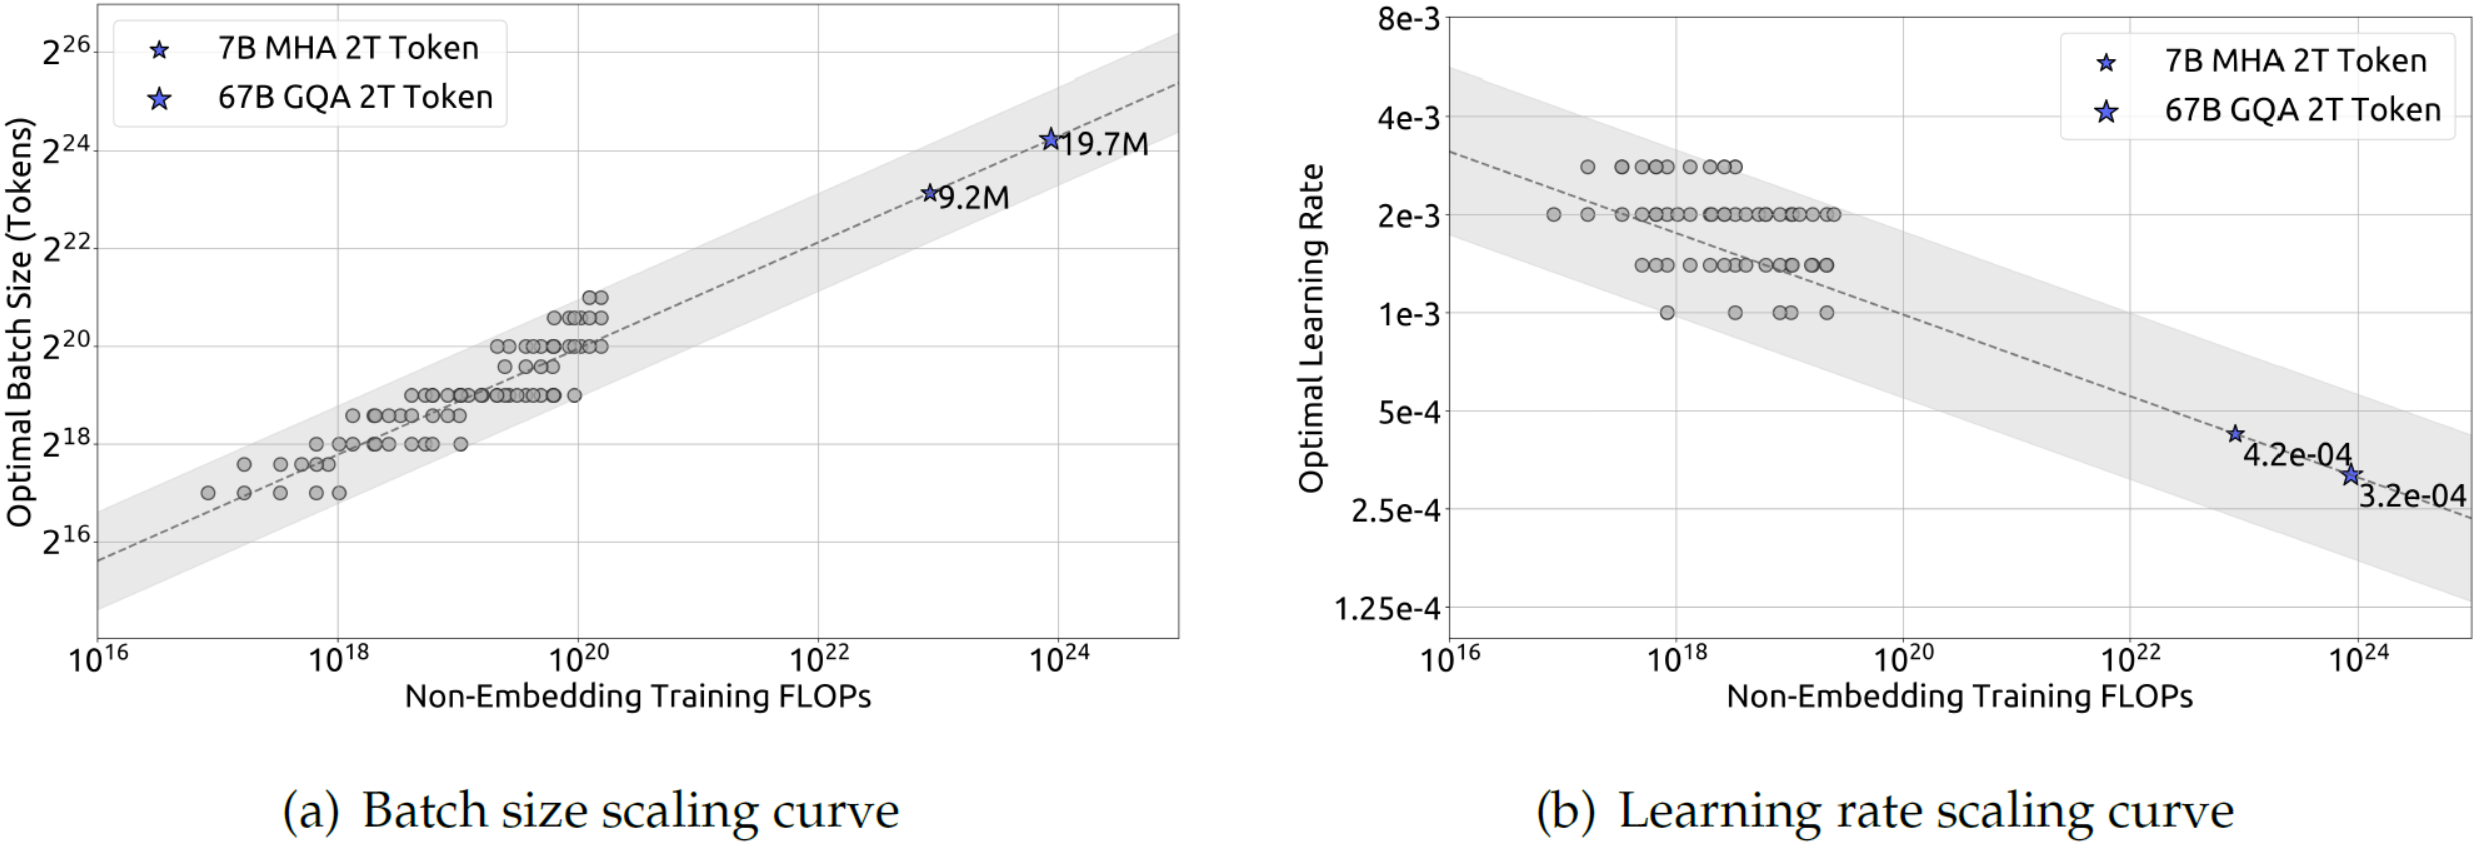

<!-- Figure 3|Scaling curves of batch size and learning rate. The grey circles represent models whose generalization error exceeded the minimum by no more than 0.25%. The dotted line represents the power law fitting the smaller model. The blue stars represent DeepSeek LLM 7B and 67B. -->
图 3. 批量大小和学习率的 scaling 曲线。灰色圆圈表示泛化误差超过最小值不超过 0.25% 的模型。虚线表示拟合较小模型的幂律。蓝色星星表示 DeepSeek LLM 7B 和 67B。

<!-- We validated our formulae on a series of models with a 1e20 compute budget, and the results of a specific model size (2.94B FLOPs per token) are shown in Figure 2(b). The results indicate that the fitted parameters are centered in the optimal parameter space. Subsequent sections also show that the parameters we fitted for DeepSeek LLM 7B and 67B models similarly achieved good performance. -->

我们在一系列具有 1e20 计算预算的模型上验证了我们的公式, 特定模型大小(每个 token 2.94B FLOP)的结果如图 2(b) 所示。结果表明, 拟合的参数位于最优参数空间的中心。后续部分也表明, 我们为 DeepSeek LLM 7B 和 67B 模型拟合的参数同样取得了良好的性能。

<!-- However, it’s important to note that we have not yet considered the impact of factors beyond the compute budget $𝐶$ on the optimal hyperparameters. This is inconsistent with some earlier works (Kaplan et al., 2020; McCandlish et al., 2018) which suggested that the optimal batch size can be modeled as being solely related to the generalization error $𝐿$. Furthermore, we observed that in models with the same compute budget but different model/data allocations, the optimal parameter space varies slightly. This suggests that further research is needed to understand the selection of hyperparameters and training dynamics. We will explore these aspects in future works. -->

然而, 值得注意的是, 我们未考虑计算预算𝐶以外的因素对最优超参数的影响。这与一些早期的研究(Kaplan et al., 2020; McCandlish et al., 2018)不一致, 这些研究表明最优批量大小可以建模为仅与泛化误差 $𝐿$ 有关。此外, 我们观察到, 在具有相同计算预算但不同模型/数据分配的模型中, 最优参数空间略有不同。这表明需要进一步研究以了解超参数的选择和训练动态。我们将在未来的工作中探索这些方面。

### Estimating Optimal Model and Data Scaling
<!-- After deriving the formulae for fitting near-optimal hyperparameters, we started fitting the scaling curve and analyzing the optimal model/data scaling-up allocation strategy. This strategy involves finding model scaling exponent $𝑎$ and data scaling exponent $𝑏$ that satisfy $𝑁_\text{opt} \propto 𝐶^𝑎$ and $𝐷_\text{opt} \propto 𝐶^𝑏$, respectively. The data scale $𝐷$ can be consistently represented by the number of tokens in the dataset. In previous works, the model scale was typically represented by model parameters, with non-embedding parameters $𝑁_1$ (Kaplan et al., 2020) and complete parameters $𝑁_2$ (Hoffmann et al., 2022). The relationship between compute budget $𝐶$ and model/data scale could be approximately described as $𝐶=6𝑁𝐷$, meaning we could use $6𝑁_1$ or $6𝑁_2$ to approximate the model scale. However, since both $6𝑁_1$ and $6𝑁_2$ do not account for the computational overhead of attention operation, and $6𝑁_2$ also includes the vocabulary computation, which contributes less to the model’s capacity, they both have significant approximation errors under certain settings. -->

在推导出拟合近似最优超参数的公式后, 我们开始拟合 scaling 曲线并分析最优模型/数据 scaling-up 分配策略。该策略涉及找到模型 scaling 指数 $𝑎$ 和数据 scaling 指数 $𝑏$, 使得$𝑁_\text{opt} \propto 𝐶^𝑎$ 和 $𝐷_\text{opt} \propto 𝐶^𝑏$。数据规模 $𝐷$ 可以用数据集中的 tokens 数量一致表示。在以前的工作中, 模型规模通常由模型参数表示, 包括 non-embedding 参数 $𝑁_1$ (Kaplan et al., 2020) 和 complete 参数 $𝑁_2$ (Hoffmann et al., 2022)。计算预算 $𝐶$ 与模型/数据规模之间的关系可以近似地描述为 $𝐶=6𝑁𝐷$, 这意味着我们可以使用 $6𝑁_1$ 或 $6𝑁_2$ 来近似模型规模。然而, 由于 $6𝑁_1$ 和 $6𝑁_2$ 都没有考虑注意力操作的计算开销, 并且 $6𝑁_2$ 还包括词汇表计算, 词汇表计算对模型的容量贡献较小, 因此在某些配置下它们都有显著的近似误差。

<!-- To mitigate these errors, we introduced a new model scale representation: non-embedding FLOPs/token $𝑀$. $𝑀$ includes the computational overhead of attention operation but does not take into account the vocabulary computation. With the model scale represented by $𝑀$, the compute budget $𝐶$ can be simply expressed as $𝐶=𝑀𝐷$. The specific differences between $6𝑁_1$, $6𝑁_2$, and𝑀are as shown in the following formulae: -->

为了缓解这些误差, 我们引入了一种新的模型规模表示: non-embedding FLOPs/token $𝑀$。$𝑀$ 包括注意力操作的计算开销, 但未考虑词汇表计算。对于用 $𝑀$ 表示的模型规模, 计算预算 $𝐶$ 可以简单表示为 $𝐶=𝑀𝐷$。$6𝑁_1$、$6𝑁_2$ 和 $𝑀$ 之间的具体差异如下式所示:

$$\begin{align} 6𝑁_1 & = 72 𝑛_\text{layer} 𝑑^2_\text{model} \\
6𝑁_2 & = 72 𝑛_\text{layer} 𝑑^2_\text{model} + 6 𝑛_\text{vocab} 𝑑_\text{model} \\
𝑀 & = 72 𝑛_\text{layer} 𝑑^2_{model} + 12 𝑛_\text{layer} 𝑑_\text{model} 𝑙_\text{seq} \end{align} \tag{2}$$
<!-- where $𝑛_\text{layer}$ represents the number of layers, $𝑑_\text{model}$ represents the model width, $𝑛_{vocab}$ is the vocabulary size, and $𝑙_\text{seq}$ is the sequence length. We assessed the differences between these three representations across models of varying scales, as shown in Table 3. The results indicate that both $6𝑁_1$ and $6𝑁_2$ either overestimate or underestimate the computational cost in models of different scales. This discrepancy is particularly pronounced in small-scale models, with differences reaching up to 50%. Such inaccuracies can introduce substantial statistical errors when fitting the scaling curve. Please refer to Appendix A.2 for further analysis regarding different representations of model scale. -->
其中 $𝑛_\text{layer}$ 表示层数, $𝑑_\text{model}$ 表示模型宽度, $𝑛_{vocab}$ 表示词汇表大小, $𝑙_\text{seq}$ 表示序列长度。我们评估了这三种表示在不同规模的模型中的差异, 如表 3 所示。结果表明, $6𝑁_1$ 和 $6𝑁_2$ 在不同规模的模型中均高估或低估了计算成本。这种差异在小规模模型中尤为明显, 差异高达 50%。这种不准确性会在拟合 scaling 曲线时引入显著的统计误差。有关模型规模的不同表示的进一步分析, 请参阅附录 A.2。

| 𝑛layers | 𝑑model | 𝑛vocab | 𝑙seq | 𝑁1 | 𝑁2 | 𝑀 | $\frac{6𝑁_1}{𝑀}$ | $\frac{6𝑁_2}{𝑀}$ |
| :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: | :-: |
| 8 | 512 | | | 25.2M | 77.6M | 352M | 0.43 | 1.32 |
| 12 | 768 | | | 84.9M | 164M | 963M | 0.53 | 1.02 |
| 24 | 1024 | | | 302M | 407M | 3.02B | 0.60 | 0.81 |
| 24 | 2048 | 102400 | 4096 | 1.21B | 1.42B | 9.66B | 0.75 | 0.88 |
| 32 | 4096 | | | 6.44B | 6.86B | 45.1B | 0.85 | 0.91 |
| 40 | 5120 | | | 12.6B | 13.1B | 85.6B | 0.88 | 0.92 |
| 80 | 8192 | | | 64.4B | 65.3B | 419B | 0.92 | 0.94 |

<!-- Table 3|Difference in model scale representations and disparities of non-embedding parameters $𝑁_1$ and complete parameters $𝑁_2$ relative to non-embedding FLOPs/token $𝑀$. -->
表 3. 模型规模表示的差异, 以及 non-embedding 参数 $𝑁_1$ 和 complete 参数 $𝑁_2$ 相对于 non-embedding FLOPs/token $𝑀$ 的差异。

<!-- After adopting $𝑀$ to represent the model scale, our objective could be described more clearly as: Given acomputing budget $𝐶=𝑀𝐷$, find the optimal model scale $𝑀_\text{opt}$ and data scale $𝐷_\text{opt}$ that minimize the generalization error of the model. This target could be formalized as: -->
采用 $𝑀$ 表示模型规模后, 我们的目标可以更清晰地描述为: <font color="red">给定计算预算$𝐶=𝑀𝐷$, 找到最优的模型规模 $𝑀_\text{opt}$ 和数据规模 $𝐷_\text{opt}$, 以最小化模型的泛化误差</font>。该目标可以表示为:
$$𝑀_\text{opt}(𝐶), 𝐷_\text{opt}(𝐶) = \mathop{\arg\min}\limits_{𝑀,𝐷 \text{ s.t. } 𝐶 = 𝑀𝐷} 𝐿(𝑁,𝐷) (3)$$

<!-- To reduce experimental costs and fitting difficulties, the IsoFLOP profile approach from Chinchilla (Hoffmann et al., 2022) was used to fit the scaling curve. We selected 8 different compute budgets ranging from 1e17 to 3e20, and designed around 10 different model/data scale allocations for each budget. The hyperparameters for each budget were determined by Formula(1), and the generalization error was calculated on an independent validation set, distributed similarly to the training set and containing 100M tokens. -->

为了降低实验成本和拟合难度, 我们使用 Chinchilla 的 IsoFLOP 配置方法 (Hoffmann et al., 2022) 来拟合 scaling 曲线。我们选择了 8 种不同的计算预算, 范围从 1e17 到 3e20, 并为每种预算设计了大约 10 种不同的模型/数据规模分配。每种预算的超参数由公式 (1) 确定, 泛化误差是在独立验证集上计算的, 该验证集的分布与训练集相似, 包含 1 亿个 tokens。
 
todo 

<!-- Figure 4|IsoFLOP curve and optimal model/data allocation. The metric in IsoFLOP curve is bits-per-byte on the validation set. The dotted lines in optimal model/data scaling curves represent the power law fitting the smaller model (grey circles). -->

图 4. IsoFLOP 曲线和最优模型/数据分配。IsoFLOP 曲线中的指标是验证集上的比特/字节。最优模型/数据 scaling 曲线中的虚线表示拟合较小模型(灰色圆点)的幂律。

<!-- Figure 4 demonstrates the IsoFLOP curve and model/data scaling curves, which are fitted by using the optimal model/data allocation for each compute budget. The specific formulae for the optimal non-embedding FLOPs/token $𝑀_\text{opt}$ and optimal tokens $𝐷_\text{opt}$ are as follows: -->

图 4 展示了 IsoFLOP 曲线和模型/数据 scaling 曲线, 这些曲线使用每个计算预算的最优模型/数据分配进行拟合。最优 non-embedding FLOP/token $𝑀_\text{opt}$ 和最优 tokens $𝐷_\text{opt}$ 的具体公式如下:

$$\begin{matrix} 𝑀_\text{opt} = 𝑀_\text{base} \cdot 𝐶^𝑎, & 𝑀_\text{base} = 0.1715, & 𝑎 = 0.5243 \\
𝐷_\text{opt} = 𝐷\text{base} \cdot 𝐶^𝑏, & 𝐷_\text{base} = 5.8316, & 𝑏 = 0.4757 \end{matrix} \tag{4}$$

<!-- Additionally, we fitted the loss scaling curve according to compute budget $𝐶$ and optimal generalization error, and predicted the generalization error for DeepSeek LLM 7B and 67B, as shown in Figure 5. The results indicate that using small-scale experiments can accurately predict the performance of models with 1000 ×compute budget. This provides both confidence and 
guidance for training models on a larger scale -->.
此外, 我们根据计算预算 $𝐶$ 和最优泛化误差, 拟合损失 scaling 曲线, 并预测了 DeepSeek LLM 7B 和 67B 的泛化误差, 如图 5 所示。结果表明, 使用小规模实验可以准确预测 具有 1000 倍计算预算的模型性能。这为在更大规模上训练模型提供了信心和指导。

<!-- 
Figure 5|Performance scaling curve. The metric is the bits-per-byte on the validation set. The dotted line represents the power law fitting the smaller model (grey circles). The blue stars represent DeepSeek LLM 7B and 67B. Their performance is well-predicted by the scaling curve -->

图 5. 性能 scaling 曲线。指标是验证集上的比特/字节。虚线表示拟合较小模型(灰色圆点)的幂律。蓝色星星表示 DeepSeek LLM 7B 和 67B。scaling 曲线很好地预测了它们的性能。.

### Scaling Laws with Different Data
<!-- In the development process of DeepSeek LLM, the dataset was iteratively refined multiple times, with adjustments in the proportions of different data sources while enhancing the overall quality. This allowed us to further analyze the impact of different datasets on scaling laws. -->

在 DeepSeek LLM 的开发过程中, 数据集经过多次迭代完善, 在提升整体质量的同时, 调整不同数据源的比重。这使我们能够进一步分析不同数据集对 scaling laws 的影响。

<!-- We studied the scaling laws using three different datasets: early in-house data, current in-house data, and OpenWebText2, which was utilized in the previous study of scaling laws (Kaplan et al., 2020). Our internal data assessment revealed that current in-house data has higher data quality than early in-house data. Furthermore, the quality of OpenWebText2 even surpasses the current in-house data, due to its smaller scale which allows for more meticulous processing. -->

我们使用三种不同的数据集研究了 scaling laws: 早期 in-house 数据、当前 in-house 数据和 OpenWebText2, 后者用于之前的 scaling laws 研究(Kaplan et al., 2020)。我们的内部数据评估表明, 当前 in-house 数据的数据质量高于早期 in-house 数据。此外, OpenWebText2 的质量甚至超过了当前 in-house 数据, 因为它的规模较小, 允许进行更细致的处理。

| Approach | Coeff. 𝑎 where $𝑁_\text{opt}(M_\text{opt}) \propto 𝐶^𝑎$ | Coeff. 𝑏 where  $𝐷_\text{opt} \propto 𝐶^𝑏$ |
| :- | :-: | :-: |
| OpenAI (OpenWebText2) | 0.73 | 0.27 |
| Chinchilla (MassiveText) | 0.49 | 0.51 |
| Ours (Early Data) | 0.450 | 0.550 |
| Ours (Current Data) | 0.524 | 0.476 |
| Ours (OpenWebText2) | 0.578 | 0.422 |

<!-- Table 4|Coefficients of model scaling and data scaling vary with training data distribution. -->

表4. 模型 scaling 和数据 scaling 的系数随训练数据分布变化。

<!-- An interesting observation from the analysis is that the optimal model/data scaling-up allocation strategy across these three datasets showed consistency with data quality. As illustrated in Table 4, as data quality improves, the model scaling exponent $𝑎$ gradually increases, while the data scaling exponent $𝑏$ decreases, which suggests that the increased compute budget should be allocated more to the model instead of the data. This finding might also explain the significant differences in optimal model/data scaling-up allocation observed in earlier studies of scaling laws. -->

分析中一个有趣的发现是, 在这三种数据集上, 最优模型/数据 scaling-up 分配策略与数据质量保持一致。如表 4 所示, 随着数据质量的提高, 模型 scaling 指数 $𝑎$ 逐渐增加, 而数据 scaling 指数 $𝑏$ 则减少, 这表明<font color="red">增加的计算预算应该更多地分配给模型而不是数据</font>。这一发现也可能解释了早期 scaling laws 研究中观察到的最优模型/数据 scaling-up 分配的显著差异。

<!-- An intuitive speculation for this finding is that high-quality data usually implies logical clarity and less predictive difficulty after sufficient training. Therefore, it’s more advantageous to scale up the model size when increasing compute budget. We will continue to pay close attention to the changes in data quality and its impact on scaling laws, and provide more analysis in future works. -->

对这一发现的直观推测是, 经过充分训练后, 高质量的数据通常意味着逻辑清晰, 预测难度较低。因此, 在增加计算预算时, 扩大模型规模更具优势。我们将继续密切关注数据质量的变化及其对 scaling laws 的影响, 并在未来的工作中提供更多分析。

## Alignment
<!-- We collect around 1.5 million instruction data instances in English and Chinese, covering a wide range of helpfulness and harmlessness topics. Our helpful data contains 1.2 million instances, with a distribution of 31.2% for general language tasks, 46.6% for mathematical problems, and 22.2% for coding exercises. The safety data consists of 300K instances, covering various sensitive topics. -->

我们收集了大约 150 万个中英文指令数据实例, 涵盖了广泛的有用且无害主题。我们的有用数据包含 120 万个实例, 其中 31.2% 是一般语言任务, 46.6% 是数学问题, 22.2% 是编程练习。安全数据包含 30 万个实例, 涵盖各种敏感主题。

<!-- Our alignment pipeline contains two stages. -->

我们的对齐 pipeline 包含两个阶段。

<!-- **Supervised Fine-T uning**: We fine-tuned our 7B model with 4 epochs, but only 2 epochs for the 67B model, since we observed the overfitting problem is serious on the 67B model. We observed that GSM8K (Cobbe et al., 2021) and HumanEval (Chen et al., 2021) are improved consistently for the 7B model, while the 67B model hits the upper bound soon. The learning rate is 1e-5 and 5e-6 for 7B and 67B models, respectively. In addition to monitoring the benchmark accuracy, we also assess the repetition ratio of a chat model during the fine-tuning process. We gathered a total of 3868 Chinese and English prompts and determined the proportion of generated responses that fail to terminate and instead endlessly repeat a sequence of text. We observed that the repetition ratio tends to rise as the quantity of math SFT data increases. This can be attributed to the fact that math SFT data occasionally includes similar patterns in reasoning. Consequently, weaker models struggle to grasp such reasoning patterns, resulting in repetitive responses. To tackle the problem, we tried two-stage fine-tuning and DPO (Rafailov et al., 2023), both of which could almost keep the benchmark score and reduce the repetition significantly. -->

**监督式微调**: 我们对 7B 模型进行了 4 个 epoch 微调, 但对 67B 模型只进行了 2 个 epoch, 因为我们观察到 67B 模型的过拟合问题很严重。我们观察到 GSM8K（GSM8K (Cobbe et al., 2021) 和 HumanEval (Chen et al., 2021) 在 7B 模型上持续改进, 而 67B 模型很快达到上限。7B 和 67B 模型的学习率分别为 1e-5 和 5e-6。除了监控基准准确率外, 我们还在微调过程中评估聊天模型的重复率。我们收集了总共 3868 个中英文提示, 并确定了无法终止并无休止重复文本序列的生成响应的比例。我们观察到, 随着数学 SFT 数据数量的增加, 重复率趋于上升。这可以归因于数学 SFT 数据偶尔包含相似的推理模式。因此, 较弱的模型难以掌握这些推理模式, 从而导致重复响应。为了解决这个问题, 我们尝试了两阶段微调和 DPO (Rafailov et al., 2023), 这两者都几乎保持基准分数并显着减少重复。
 
<!-- **DPO**: To further enhance the model’s ability, we used the direct preference optimization algorithm (Rafailov et al., 2023), which is proven to be a simple but effective method for LLM alignment. We constructed the preference data for DPO training in terms of helpfulness and harmlessness. For helpfulness data, we collected multilingual prompts, which cover categories including creative writing, question answering, instruction following, and so on. Then we generated responses using our DeepSeek Chat models as response candidates. Similar operations are applied to harmlessness preference data construction. -->

**DPO**: 为了进一步增强模型的能力, 我们使用了直接偏好优化算法(Rafailov et al., 2023), 该算法被证明是一种简单但有效的 LLM 对齐方法。我们从有用性和无害性的角度, 构建了 DPO 训练的偏好数据。对于有用性数据, 我们收集了多语言提示, 涵盖创意写作、问答、指令遵循等类别。然后, 我们使用 DeepSeek Chat 模型生成响应作为响应候选。类似的操作也应用于无害偏好数据的构建。

<!-- We trained an epoch for DPO, with a learning rate of 5e-6 and batch size of 512, and we used a learning rate warmup and cosine learning rate scheduler. We found out that DPO can strengthen the model’s open-ended generation skill, while engendering little difference in performance among standard benchmarks. -->

我们对 DPO 训练了一个 epoch, 学习率为 5e-6, 批量大小为 512, 并使用了学习率预热和余弦学习率调度器。我们发现 DPO 可以增强模型的开放式生成能力, 同时在标准基准上性能差异不大。

## Evaluation

todo

## Conclusion, Limitation, and Future Work
<!-- We introduce DeepSeek LLMs, a series of open-source models trained from scratch on a vast dataset of 2 trillion tokens in both English and Chinese. In this paper, we provide an in-depth explanation of hyper-parameters selection, scaling laws, as well as the various fine-tuning attempts we made. We calibrate the scaling laws in the previous work and propose a new optimal model/data scaling-up allocation strategy. In addition, we present a method to predict the near-optimal batch size and learning rate with given compute budget. We further conclude that the scaling laws is related to the data quality, which might be the root cause of varying scaling behavior in different works. Guided by the scaling laws, we conduct pre-training with the best hyper-parameter and provide a comprehensive evaluation. We avoid benchmark decoration and dark secrets in all training stages. -->

我们提出了 DeepSeek LLM, 一系列开源模型, 在包含 2 万亿个中英文的庞大数据集上从头开始训练。在本文中, 我们深入解释了超参数选择、scaling laws 以及我们所做的各种微调尝试。我们校准了前人研究中的 scaling laws, 并提出了一种新的最优模型/数据 scaling-up 分配策略。此外, 我们提出了一种在给定计算预算下, 预测近似最优的批批量大小和学习率的方法。我们进一步得出结论, scaling laws 与数据质量有关, 这可能是不同研究中 scaling 行为不同的根本原因。在 scaling laws 的指导下, 我们使用最优超参数进行预训练 并提供全面的评估。我们在所有训练阶段都避免了基准修饰和隐秘问题。

<!-- DeepSeek Chat shares the acknowledged limitations commonly found in other LLMs, which include the lack of ongoing knowledge updates after pre-training, the possibility of generating non-factual information such as unverified advice, and a tendency to produce hallucinations. Moreover, it is important to note that our initial version of Chinese data is not exhaustive, which may result in suboptimal performance on certain Chinese-specific topics. Since our data primarily consists of Chinese and English sources, the model’s proficiency in other languages remains delicate and should be approached with caution. -->

DeepSeek Chat 共享了其他 LLMs 常见的已知局限性, 包括预训练后缺乏持续的知识更新、可能生成非事实信息(如未经证实的建议), 以及容易产生幻觉。此外, 值得注意的是, 我们的初始中文数据并不详尽, 这可能导致在某些特定中文主题上的性能欠佳。由于我们的数据主要由中文和英文来源组成, 因此模型在其他语言上的熟练程度仍然较为脆弱, 使用时需谨慎。

<!-- DeepSeek LLM is a long-term project committed to advancing open-source language models.
- Soon, we will release our technique reports in code intelligence and Mixture-of-Experts (MoE), respectively. They show how we create high-quality code data for pre-training, and design a sparse model to achieve dense model performance.
- At present, we are constructing a larger and improved dataset for the upcoming version of DeepSeek LLM. We hope the reasoning, Chinese knowledge, math, and code capabilities will be significantly improved in the next version.
- Our alignment team is dedicated to studying ways to deliver a model that is helpful, honest, and safe to the public. Our initial experiments prove that reinforcement learning could boost model complex reasoning capability.
 -->
DeepSeek LLM 是一个长期项目, 致力于推动开源语言模型的发展。
- 不久, 我们将分别发布关于代码智能和 Mixture-of-Experts (MoE) 的技术报告。它们展示了我们如何为预训练创建高质量代码数据, 以及设计稀疏模型以实现密集模型性能。
- 目前, 我们正在为即将推出的 DeepSeek LLM 版本构建更大且改进的数据集。我们希望在下一版本中, 推理、中文知识、数学和编程能力将显著提升。
- 我们的对齐团队致力于研究如何向公众提供一个有用、诚实和安全的模型。我们的初步实验证明, 强化学习可以提高模型的复杂推理能力。

# [DeepSeek-V2: A Strong, Economical, and Efficient Mixture-of-Experts Language Model](https://arxiv.org/abs/2405.04434)

**Abstract**  
<!-- We present DeepSeek-V2, a strong Mixture-of-Experts (MoE) language model characterized by economical training and efficient inference. It comprises 236B total parameters, of which 21B are activated for each token, and supports a context length of 128K tokens. DeepSeek-V2 adopts innovative architectures including Multi-head Latent Attention (MLA) and DeepSeekMoE. MLA guarantees efficient inference through significantly compressing the Key-Value (KV) cache into a latent vector, while DeepSeekMoE enables training strong models at an economical cost through sparse computation. Compared with DeepSeek 67B, DeepSeek-V2 achieves significantly stronger performance, and meanwhile saves 42.5% of training costs, reduces the KV cache by 93.3%, and boosts the maximum generation throughput to 5.76 times. We pretrain DeepSeek-V2 on a high-quality and multi-source corpus consisting of 8.1T tokens, and further perform Supervised Fine-Tuning (SFT) and Reinforcement Learning (RL) to fully unlock its potential. Evaluation results show that, even with only 21B activated parameters, DeepSeek-V2 and its chat versions still achieve top-tier performance among open-source models. The model checkpoints are available at https://github.com/deepseek-ai/DeepSeek-V2. -->

我们提出了 DeepSeek-V2, 一种强大的 Mixture-of-Experts (MoE) 语言模型, 以经济的训练和高效的推理为特点。它包含 236B 总参数, 其中每个 token 激活 21B, 支持 128K tokens 的上下文长度。DeepSeek-V2 采用创新的架构, 包括 Multi-head Latent Attention (MLA) 和 DeepSeekMoE。<font color="red">MLA 通过将 Key-Value (KV) cache 显著压缩为潜在向量, 保证高效推理, 而 DeepSeekMoE 通过稀疏计算以经济的成本训练强大的模型</font>。与 DeepSeek 67B 相比, DeepSeek-V2 实现了显著增强的性能, 同时节省 42.5% 的训练成本, 减少 93.3% 的 KV 缓存, 并将最大生成吞吐量提升至 5.76 倍。我们在一个由 8.1T tokens 组成的高质量多源语料库上对 DeepSeek-V2 进行预训练, 并进一步执行监督微调 (SFT) 和强化学习 (RL) 以充分释放其潜力。评估结果表明, 即使只有 21B 激活参数, DeepSeek-V2 及其聊天版本仍然在开源模型中实现顶级性能。模型 checkpoints 可在 https://github.com/deepseek-ai/DeepSeek-V2 获取。

## Introduction
In the past few years, Large Language Models (LLMs) (Anthropic, 2023; Google, 2023; OpenAI, 2022, 2023) have undergone rapid development, offering a glimpse into the dawn of Artificial General Intelligence (AGI). In general, the intelligence of an LLM tends to improve as the number of parameters increases, allowing it to exhibit emergent capabilities across various tasks (Wei et al., 2022). However, the improvement comes at the cost of larger computing resources for training and a potential decrease in inference throughput. These constraints present significant challenges that impede the widespread adoption and utilization of LLMs. In order to tackle this problem, we introduce DeepSeek-V2, a strong open-source Mixture-of-Experts (MoE) language model, characterized by economical training and efficient inference through an innovative Transformer architecture. It is equipped with a total of 236B parameters, of which 21B are activated for each token, and supports a context length of 128K tokens.

We optimize the attention modules and Feed-Forward Networks (FFNs) within the Transformer framework (Vaswani et al., 2017) with our proposed Multi-head Latent Attention (MLA) and DeepSeekMoE . (1) In the context of attention mechanisms, the Key-Value (KV) cache of the Multi-Head Attention (MHA) (Vaswani et al., 2017) poses a significant obstacle to the inference efficiency of LLMs. Various approaches have been explored to address this issue, including Grouped-Query Attention (GQA) (Ainslie et al., 2023) and Multi-Query Attention (MQA) (Shazeer, 2019). However, these methods often compromise performance in their attempt to reduce the KV cache. In order to achieve the best of both worlds, we introduce MLA, an attention mechanism equipped with low-rank key-value joint compression. Empirically, MLA achieves superior performance compared with MHA, and meanwhile significantly reduces the KV cache during inference, thus boosting the inference efficiency. (2) For Feed-Forward Networks (FFNs), we follow the DeepSeekMoE architecture (Dai et al., 2024), which adopts fine-grained expert segmentation and shared expert isolation for higher potential in expert specialization. The DeepSeekMoE architecture demonstrates great advantages compared with conventional MoE architectures like GShard (Lepikhin et al., 2021), enabling us to train strong models at an economical cost. As we employ expert parallelism during training, we also devise supplementary mechanisms to control communication overheads and ensure load balance. By combining these two techniques, DeepSeek-V2 features strong performance (Figure 1(a)), economical training costs, and efficient inference throughput (Figure 1(b)), simultaneously.

We construct a high-quality and multi-source pre-training corpus consisting of 8.1T tokens. Compared with the corpus used in DeepSeek 67B (our previous release) (DeepSeek-AI, 2024), this corpus features an extended amount of data, especially Chinese data, and higher data quality. We first pretrain DeepSeek-V2 on the full pre-training corpus. Then, we collect 1.5M conversational sessions, which encompass various domains such as math, code, writing, reasoning, safety, and more, to perform Supervised Fine-Tuning (SFT) for DeepSeek-V2 Chat (SFT). Finally, we follow DeepSeekMath (Shao et al., 2024) to employ Group Relative Policy Optimization (GRPO) to further align the model with human preference and produce DeepSeek-V2 Chat (RL).

We evaluate DeepSeek-V2 on a wide range of benchmarks in English and Chinese, and compare it with representative open-source models. Evaluation results show that even with only 21B activated parameters, DeepSeek-V2 still achieves top-tier performance among open-source models and becomes the strongest open-source MoE language model. Figure 1(a) highlights that, on MMLU, DeepSeek-V2 achieves top-ranking performance with only a small number of activated parameters. In addition, as shown in Figure 1(b), compared with DeepSeek 67B, DeepSeek-V2 saves 42.5% of training costs, reduces the KV cache by 93.3%, and boosts the maximum generation throughput to 5.76 times. We also evaluate DeepSeek-V2 Chat (SFT) and DeepSeek-V2 Chat (RL) on open-ended benchmarks. Notably, DeepSeek-V2 Chat (RL) achieves 
38.9 length-controlled win rate on AlpacaEval 2.0 (Dubois et al., 2024), 8.97 overall score o 
MT-Bench (Zheng et al., 2023), and 7.91 overall score on AlignBench (Liu et al., 2023). T e
English open-ended conversation evaluations demonstrate that DeepSeek-V2 Chat (RL) has tp-
tier performance among open-source chat models. In addition, the evaluation on AlignB nch
indicates that in Chinese, DeepSeek-V2 Chat (RL) outperforms all of open-source models  and
even beats most of closed-source m
odels.
In order to facilitate further research and development on MLA and DeepSeekMoE,  e also
release DeepSeek-V2-Lite, a smaller model equipped with MLA and DeepSeekMoE, for the
open-source community. It has a total of 15.7B parameters, where 2.4B are activated for each
token. Detailed descriptions about DeepSeek-V2-Lite can be found in A
ppendix B.
In the rest of this paper, we first provide a detailed description of the model arch tecture of
DeepSeek-V2 (Section 2). Subsequently, we introduce our pre-training endeavors, i cluding the
training data construction, hyper-parameter settings, infrastructures, long conte t extension,
and the evaluation of model performance and efficiency (Section 3). Following is, we demon-
strate our efforts in alignment, encompassing Supervised Fine-Tuning (SFT) Learning (RL), the evaluation results, and other discussion (Section 4). Finally, we summarize 
the conclusion, deliberate on the current limitations of DeepSeek-V2, and outline our futur 
work (Section 5)., Reinforcement

## Architecture
<!-- By and large, DeepSeek-V2 is still in the Transformer architecture (Vaswani et al., 2017), where each Transformer block consists of an attention module and a Feed-Forward Network (FFN). However, for both the attention module and the FFN, we design and employ innovative architectures. For attention, we design MLA, which utilizes low-rank key-value joint compression to eliminate the bottleneck of inference-time key-value cache, thus supporting efficient inference. For FFNs, we adopt the DeepSeekMoE architecture (Dai et al., 2024), a high-performance MoE architecture that enables training strong models at an economical cost. An illustration of the architecture of DeepSeek-V2 is presented in Figure 2, and we will introduce the details of MLA and DeepSeekMoE in this section. For other tiny details (e.g., layer normalization and the activation function in FFNs), unless specifically stated, DeepSeek-V2 follows the settings of DeepSeek 67B (DeepSeek-AI, 2024). -->

总体而言, DeepSeek-V2 仍采用 Transformer 架构(Vaswani et al., 2017), 其中每个 Transformer 块由一个 attention 模块和一个 Feed-Forward Network (FFN) 组成。然而, 对于 attention 模块和 FFN, 我们设计并采用创新的架构。<font color="red">对于 attention, 我们设计了 MLA, 它利用低秩键值联合压缩来消除推理时间键值缓存的瓶颈, 从而支持高效的推理。对于 FFNs, 我们采用 DeepSeekMoE 架构(Dai et al., 2024), 一种高性能的 MoE 架构, 能够以经济的成本训练强大的模型</font>。DeepSeek-V2 的架构示意图见图 2, 我们将在本节中介绍 MLA 和 DeepSeekMoE 的细节。对于其他微小的细节(例如, layer normalization 和 FFNs 中的激活函数), 除非特别说明, DeepSeek-V2 遵循 DeepSeek 67B (DeepSeek-AI, 2024) 的配置。

todo

<!-- Figure 2|Illustration of the architecture of DeepSeek-V2. MLA ensures efficient inference by significantly reducing the KV cache for generation, and DeepSeekMoE enables training strong models at an economical cost through the sparse architecture. -->
图 2. DeepSeek-V2 架构示意图。MLA 通过大幅减少生成的 KV 缓存来确保高效推理, DeepSeekMoE 通过稀疏架构以经济的成本训练强大的模型。

### Multi-Head Latent Attention: Boosting Inference Efficiency
<!-- Conventional Transformer models usually adopts Multi-Head Attention (MHA) (Vaswani et al., 2017), but during generation, its heavy Key-Value (KV) cache will become the bottleneck that limit the inference efficiency. In order to reduce the KV cache, Multi-Query Attention (MQA) (Shazeer, 2019) and Grouped-Query Attention (GQA) (Ainslie et al., 2023) are proposed. They require a smaller magnitude of KV cache, but their performance does not match MHA (we provide the ablation of MHA, GQA and MQA in Appendix D.1). -->

传统的 Transformer 模型通常采用 Multi-Head Attention (MHA) (Vaswani et al., 2017), 但在生成过程中, <font color="red">其繁重的 Key-Value (KV) cache 会成为限制推理效率的瓶颈</font>。为了减少 KV 缓存, 提出了Multi-Query Attention (MQA) (Shazeer, 2019) 和 Grouped-Query Attention (GQA) (Ainslie et al., 2023)。它们需要更小规模的 KV 缓存, 但性能不如 MHA (我们在附录 D.1 中提供了 MHA、GQA 和 MQA 的消融实验)。

<!-- For DeepSeek-V2, we design an innovative attention mechanism called Multi-head Latent Attention (MLA). Equipped with low-rank key-value joint compression, MLA achieves better performance than MHA, but requires a significantly smaller amount of KV cache. We introduce its architecture in the following, and also provide a comparison between MLA and MHA in Appendix D.2. -->

对于 DeepSeek-V2, 我们设计了一种创新的注意力机制, 称为 Multi-head Latent Attention (MLA)。MLA 配备了低秩键值联合压缩, 性能优于 MHA, 但所需的 KV 缓存量显著更小。我们在下面介绍它的架构, 并在附录 D.2 中提供 MLA 和 MHA 的比较。

#### Preliminaries: Standard Multi-Head Attention
<!-- We first introduce the standard MHA mechanism as background. Let $𝑑$ be the embedding dimension, $𝑛_ℎ$ be the number of attention heads, $𝑑_ℎ$ be the dimension per head, and $h_𝑡 \in \mathbb{R}^𝑑$ be the attention input of the $𝑡$-th token at an attention layer. Standard MHA first produces $q_𝑡, k_𝑡, v_𝑡 \in \mathbb{R}^{𝑑_ℎ 𝑛_ℎ}$ through three matrices $𝑊^𝑄, 𝑊^𝐾, 𝑊^𝑉 \in \mathbb{R}^{𝑑_ℎ 𝑛_ℎ \times 𝑑}$, respectively: -->

我们首先介绍标准的 MHA 机制作为背景。令 $𝑑$ 为 embedding 维度, $𝑛_ℎ$ 为注意力头的数量, $𝑑_ℎ$ 为每个注意力头的维度, $h_𝑡 \in \mathbb{R}^𝑑$ 为第 $t$ 个 token 在注意力层的输入。标准 MHA 首先通过三个矩阵 $𝑊^𝑄, 𝑊^𝐾, 𝑊^𝑉 \in \mathbb{R}^{𝑑_ℎ 𝑛_ℎ \times 𝑑}$ 分别生成 $q_𝑡, k_𝑡, v_𝑡 \in \mathbb{R}^{𝑑_ℎ 𝑛_ℎ}$:

$$\begin{align} q_𝑡 & = 𝑊^𝑄 h_𝑡 \tag{1} \\
k_𝑡 & = 𝑊^𝐾 h_𝑡 \tag{2} \\
v_𝑡 & = 𝑊^𝑉 h_𝑡 \tag{3} \end{align} $$

<!-- Then, $q_𝑡,k_𝑡,v_𝑡$ will be sliced into $𝑛_ℎ$ heads for the multi-head attention computation: -->
然后, $q_𝑡,k_𝑡,v_𝑡$ 将被切分成 $𝑛_ℎ$ 个头, 用于多头注意力计算:

$$\begin{align}
& \left[ q_{𝑡,1};q_{𝑡,2};\dots;q_{𝑡,𝑛_ℎ} \right] = q_𝑡, \tag{4} \\
& \left[ k_{𝑡,1};k_{𝑡,2};\dots;k_{𝑡,𝑛_ℎ} \right] = k_𝑡, \tag{5} \\
& \left[ v_{𝑡,1};v_{𝑡,2};\dots;v_{𝑡,𝑛_ℎ} \right] = v_𝑡, \tag{6} \\
o_{𝑡,𝑖} & = \sum_{j=1}^t \text{Softmax}_𝑗 \left( \frac{q^𝑇_{𝑡,𝑖} k_{𝑗,𝑖}}{\sqrt{𝑑_ℎ}} \right) v_{𝑗,𝑖}, \tag{7} \\
u_𝑡 & = 𝑊^𝑂 \left[ o_{𝑡,1};o_{𝑡,2};\dots;o_{𝑡,𝑛_ℎ} \right], \tag{8} \end{align} $$
<!-- where $q_{𝑡,𝑖},k_{𝑡,𝑖},v_{𝑡,𝑖} \in \mathbb{R}^{𝑑_ℎ}$ denote the query, key, and value of the $𝑖$-th attention head, respectively; $𝑊^𝑂 \in \mathbb{R}^{𝑑 \times 𝑑_ℎ 𝑛_ℎ}$ denotes the output projection matrix. During inference, all keys and values need to be cached to accelerate inference, so MHA needs to cache $2𝑛_ℎ 𝑑_ℎ 𝑙$ elements for each token. In model deployment, this heavy KV cache is a large bottleneck that limits the maximum batch size and sequence length. -->
其中 $q_{𝑡,𝑖},k_{𝑡,𝑖},v_{𝑡,𝑖} \in \mathbb{R}^{𝑑_ℎ}$ 分别表示第 $𝑖$ 个注意力头的 query、key 和 value; $𝑊^𝑂 \in \mathbb{R}^{𝑑 \times 𝑑_ℎ 𝑛_ℎ}$ 表示输出投影矩阵。在推理过程中, 需要缓存所有 key 和 value 以加速推理, 因此 MHA 需要为每个 token 缓存 $2𝑛_ℎ 𝑑_ℎ 𝑙$ 个元素。在模型部署中, <font color="red">这种繁重的 KV 缓存是一大瓶颈, 它限制最大批量大小和序列长度</font>。

#### Low-Rank Key-Value Joint Compression
<!-- The core of MLA is the low-rank joint compression for keys and values to reduce KV cache: -->
MLA 的核心是对 key 和 value 进行低秩联合压缩, 以减少 KV 缓存:
$$\begin{align} c_t^{𝐾𝑉} & = 𝑊^{𝐷𝐾𝑉} h_𝑡 \tag{9} \\
k_𝑡^C & = 𝑊^{U𝐾} c_t^{𝐾𝑉} \tag{10} \\
v_𝑡^C & = 𝑊^{U𝑉} c_t^{𝐾𝑉} \tag{11} \end{align} $$
<!-- where $c_t^{𝐾𝑉} \in \mathbb{R}^{𝑑_𝑐}$ is the compressed latent vector for keys and values; $𝑑_𝑐 (\ll 𝑑_ℎ 𝑛_ℎ)$ denotes the KV compression dimension; $𝑊^{𝐷𝐾𝑉} \in \mathbb{R}^{𝑑_𝑐 \times 𝑑}$ is the down-projection matrix; and $𝑊^{𝑈𝐾},𝑊^{𝑈𝑉} \in \mathbb{R}^{𝑑_ℎ 𝑛_ℎ \times 𝑑_𝑐}$ are the up-projection matrices for keys and values, respectively. During inference, MLA only needs to cache $c^{𝐾𝑉}_𝑡$, so its KV cache has only $𝑑_𝑐 𝑙$ elements, where $𝑙$ denotes the number of layers. In addition, during inference, since $𝑊^{𝑈𝐾}$ can be absorbed into $𝑊^𝑄$, and $𝑊^{𝑈𝑉}$ can be absorbed into $𝑊^𝑂$, we even do not need to compute keys and values out for attention. Figure 3 intuitively illustrates how the KV joint compression in MLA reduces the KV cache. -->
其中 $c_t^{𝐾𝑉} \in \mathbb{R}^{𝑑_𝑐}$ 为键和值的压缩 latent 向量; $𝑑_𝑐 (\ll 𝑑_ℎ 𝑛_ℎ)$ 为 KV 压缩维度; $𝑊^{𝐷𝐾𝑉} \in \mathbb{R}^{𝑑_𝑐 \times 𝑑}$ 为 down-projection 矩阵; $𝑊^{𝑈𝐾},𝑊^{𝑈𝑉} \in \mathbb{R}^{𝑑_ℎ 𝑛_ℎ \times 𝑑_𝑐}$ 分别是键和值的 up-projection 矩阵。在推理过程中, MLA 只需缓存 $c^{𝐾𝑉}_𝑡$, 因此其 KV 缓存只有 $𝑑_𝑐 𝑙$ 个元素, 其中 $𝑙$ 表示层数。此外, 在推理过程中, 由于 $𝑊^{𝑈𝐾}$ 可以被吸收到 $𝑊^𝑄$ 中, 并且 $𝑊^{𝑈𝑉}$ 可以被吸收到 $𝑊^𝑂$ 中, 我们甚至不需要为注意力计算出键和值。图 3 直观地展示了 MLA 中的 KV 联合压缩如何减少 KV 缓存。

todo

<!-- Figure 3|Simplified illustration of Multi-Head Attention (MHA), Grouped-Query Attention (GQA), Multi-Query Attention (MQA), and Multi-head Latent Attention (MLA). Through jointly compressing the keys and values into a latent vector, MLA significantly reduces the KV cache during inference. -->

图 3. Multi-Head Attention (MHA), Grouped-Query Attention (GQA), Multi-Query Attention (MQA) 和 Multi-head Latent Attention (MLA) 的简化示意图。通过将键和值联合压缩为 latent 向量, MLA 显著减少推理过程中的 KV 缓存。

<!-- Moreover, in order to reduce the activation memory during training, we also perform low-rank compression for the queries, even if it cannot reduce the KV cache: -->
此外, 为了减少训练期间的激活内存, 我们也对 queries 执行低秩压缩, 即使它不能减少 KV 缓存:
$$\begin{align} c_t^{Q} & = 𝑊^{𝐷Q} h_𝑡 \tag{12} \\
q_𝑡^C & = 𝑊^{UQ} c_t^{Q} \tag{13} \end{align} $$
<!-- where $c_t^𝑄 \in \mathbb{R}^{𝑑_c^{′}}$ is the compressed latent vector for queries; $𝑑_c^{′} (\ll 𝑑_ℎ 𝑛_ℎ)$ denotes the query compression dimension; and $𝑊^{𝐷𝑄} \in \mathbb{R}^{𝑑_c^{′} \times d}, 𝑊^{𝑈𝑄} \in \mathbb{R}^{𝑑_ℎ 𝑛_ℎ \times 𝑑_c^{′}}$ are the down-projection and up-projection matrices for queries, respectively. -->
其中 $c_t^𝑄 \in \mathbb{R}^{𝑑_c^{′}}$ 为 queries 的压缩 latent 向量; $𝑑_c^{′} (\ll 𝑑_ℎ 𝑛_ℎ)$ 为 query 压缩维度; $𝑊^{𝐷𝑄} \in \mathbb{R}^{𝑑_c^{′} \times d}, 𝑊^{𝑈𝑄} \in \mathbb{R}^{𝑑_ℎ 𝑛_ℎ \times 𝑑_c^{′}}$ 分别为 queries 的 down-projection 和 up-projection 矩阵。

#### Decoupled Rotary Position Embedding
<!-- Following DeepSeek 67B (DeepSeek-AI, 2024), we intend to use the Rotary Position Embedding (RoPE) (Su et al., 2024) for DeepSeek-V2. However, RoPE is incompatible with low-rank KV compression. To be specific, RoPE is position-sensitive for both keys and queries. If we apply RoPE for the keys $k^𝐶_𝑡, 𝑊^{𝑈𝐾}$ in Equation 10 will be coupled with a position-sensitive RoPE matrix. In this way, $𝑊^{𝑈𝐾}$ cannot be absorbed into $𝑊^𝑄$ any more during inference, since a RoPE matrix related to the currently generating token will lie between $𝑊^𝑄$ and $𝑊^{𝑈𝐾}$ and matrix multiplication does not obey a commutative law. As a result, we must recompute the keys for all the prefix tokens during inference, which will significantly hinder the inference efficiency. -->

继 DeepSeek 67B (DeepSeek-AI, 2024) 之后, 我们打算在 DeepSeek-V2 中使用 Rotary Position Embedding (RoPE) (Su et al., 2024)。然而, <font color="red">**RoPE 与低秩 KV 压缩不兼容**。具体而言, RoPE 对 keys 和 queries 都是位置敏感的。如果我们对 keys $k^C_t$ 应用 RoPE, 公式 10 中的 $W^{UK}$ 将与一个位置敏感的 RoPE 矩阵耦合。这样一来, 在推理过程中, $𝑊^{𝑈𝐾}$ 无法再被吸收到 $𝑊^𝑄$ 中, 因为与当前生成 token 相关的 RoPE 矩阵将位于 $𝑊^𝑄$ 和 $𝑊^{𝑈𝐾}$ 之间, 并且矩阵乘法不遵循交换律。因此, 我们必须在推理过程中重新计算所有前缀 tokens 的 keys, 这将显著影响推理效率</font>。

<!-- As a solution, we propose the decoupled RoPE strategy that uses additional multi-head queries $q^𝑅_{𝑡,𝑖} \in \mathbb{R}^{𝑑^𝑅_ℎ}$ and a shared key $k^𝑅_𝑡 \in \mathbb{R}^{𝑑^𝑅_ℎ}$ to carry RoPE, where $𝑑^{𝑅_ℎ}$ denotes the per-head dimension of the decoupled queries and key. Equipped with the decoupled RoPE strategy, MLA performs the following computation: -->

作为一种解决方案, 我们提出了解耦的 RoPE 策略, 该策略使用额外的多头 queries $q^𝑅_{𝑡,𝑖} \in \mathbb{R}^{𝑑^𝑅_ℎ}$ 和一个共享 key $k^𝑅_𝑡 \in \mathbb{R}^{𝑑^𝑅_ℎ}$ 来承载 RoPE, 其中 $𝑑^{𝑅_ℎ}$ 表示解耦的 queries 和 key 的每个头维度。配备解耦的 RoPE 策略, MLA 执行以下计算:
$$\begin{align}
\left[ q_{𝑡,1}^R;q_{𝑡,2}^R;\dots;q_{𝑡,𝑛_ℎ}^R \right] = q_𝑡^R & = \text{RoPE} \left( 𝑊^{𝑄𝑅}c^𝑄_𝑡 \right), \tag{14} \\
k_𝑡^R & = \text{RoPE} \left( 𝑊^{𝐾𝑅} h_𝑡 \right), \tag{15} \\
q_{𝑡,𝑖} & = \left[q^𝐶_{𝑡,𝑖};q^𝑅_{𝑡,i} \right], \tag{16} \\
k_{𝑡,𝑖} & = \left[k^𝐶_{𝑡,𝑖};k^𝑅_{𝑡} \right], \tag{17} \\
o_{𝑡,𝑖} & = \sum_{j=1}^t \text{Softmax}_𝑗 \left( \frac{q^𝑇_{𝑡,𝑖} k_{𝑗,𝑖}}{\sqrt{𝑑_ℎ + d_h^R}} \right) v_{𝑗,𝑖}^C, \tag{18} \\
u_𝑡 & = 𝑊^𝑂 \left[ o_{𝑡,1};o_{𝑡,2};\dots;o_{𝑡,𝑛_ℎ} \right], \tag{19} \end{align} $$
<!-- where $𝑊^{𝑄𝑅} \in \mathbb{R}^{𝑑^𝑅_ℎ 𝑛_ℎ \times 𝑑^{′}_𝑐}$ and $𝑊^{𝐾𝑅} \in \mathbb{R}^{𝑑^𝑅_ℎ \times 𝑑}$ are matrices to produce the decouples queries and key, respectively; $\text{RoPE}(\cdot)$ denotes the operation that applies RoPE matrices; and $[\cdot;\cdot]$ denotes the concatenation operation. During inference, the decoupled key should also be cached. Therefore, DeepSeek-V2 requires a total KV cache containing $(𝑑_𝑐 + 𝑑^𝑅_ℎ) 𝑙$ elements.  -->
其中 $𝑊^{𝑄𝑅} \in \mathbb{R}^{𝑑^𝑅_ℎ 𝑛_ℎ \times 𝑑^{′}_𝑐}$ 和 $𝑊^{𝐾𝑅} \in \mathbb{R}^{𝑑^𝑅_ℎ \times 𝑑}$ 分别是用于生成解耦 queries 和 key 的矩阵; $\text{RoPE}(\cdot)$ 表示应用 RoPE 矩阵的操作; $[\cdot;\cdot]$ 表示拼接操作。在推理过程中, 解耦的 key 也需要被缓存。因此, DeepSeek-V2 需要总共包含 $(𝑑_𝑐 + 𝑑^𝑅_ℎ) 𝑙$ 个元素的 KV 缓存。

<!-- In order to demonstrate the complete computation process of MLA, we also organize and provide its full formulas in Appendix C. -->
为了展示 MLA 的完整计算过程, 我们还在附录 C 中整理并提供了其完整公式。

todo Appendix C

#### Comparison of Key-Value Cache
We demonstrate a comparison of the KV cache per token among different attention mechanisms in Table 1. MLA requires only a small amount of KV cache, equal to GQA with only 2.25 groups, but can achieve stronger performance than MHA.

我们在表 1 中展示了不同注意力机制中每个 token 的 KV 缓存的比较。MLA 只需要少量的 KV 缓存, 相当于只有 2.25 组的 GQA, 但可以实现比 MHA 更强的性能。

| Attention Mechanism | KV Cache per Token (# Element) | Capability |
| :- | :-: | :-: |
| Multi-Head Attention (MHA) | $2 𝑛_ℎ 𝑑_ℎ 𝑙$ | Strong |
| Grouped-Query Attention (GQA) | $2 𝑛_𝑔 𝑑_ℎ 𝑙$ | Moderate |
| Multi-Query Attention (MQA) | $2 𝑑_ℎ 𝑙$ | Weak |
| MLA (Ours) | $\left( 𝑑_𝑐 + 𝑑^𝑅_ℎ \right) 𝑙 \approx \frac{9}{2}𝑑_ℎ 𝑙$ | Stronger |

<!-- Table 1|Comparison of the KV cache per token among different attention mechanisms. $𝑛_ℎ$ denotes the number of attention heads, $𝑑_ℎ$ denotes the dimension per attention head, $𝑙$ denotes the number of layers, $𝑛_𝑔$ denotes the number of groups in GQA, and $𝑑_𝑐$ and $𝑑^𝑅_ℎ$ denote the KV compression dimension and the per-head dimension of the decoupled queries and key in MLA, respectively. The amount of KV cache is measured by the number of elements, regardless of the storage precision. For DeepSeek-V2, $𝑑_𝑐$ is set to $4𝑑_ℎ$ and $𝑑^𝑅_ℎ$ is set to $\frac{𝑑_ℎ}{2}$. So, its KV cache is equal to GQA with only 2.25 groups, but its performance is stronger than MHA. -->
表 1. 不同注意力机制中每个 token 的 KV 缓存对比。$𝑛_ℎ$ 表示注意力头数量, $𝑑_ℎ$ 表示每个注意力头的维度, $𝑙$ 表示层数, $𝑛_𝑔$ 表示 GQA 中的组数, $𝑑_𝑐$ 和 $𝑑^𝑅_ℎ$ 分别表示 MLA 中 KV 压缩维度和解耦的 queries 和 key 的每个头的维度。KV 缓存量通过元素数量衡量, 与存储精度无关。对于 DeepSeek-V2, $𝑑_𝑐$ 设置为 $4𝑑_ℎ$, $𝑑^𝑅_ℎ$ 设置为 $\frac{𝑑_ℎ}{2}$。所以, 它的 KV 缓存与只有 2.25 组的 GQA 相当, 但其性能强于 MHA。

### DeepSeekMoE: Training Strong Models at Economical Costs
#### Basic Architecture
<!-- For FFNs, we employ the DeepSeekMoE architecture (Dai et al., 2024). DeepSeekMoE has two key ideas: segmenting experts into finer granularity for higher expert specialization and more accurate knowledge acquisition, and isolating some shared experts for mitigating knowledge redundancy among routed experts. With the same number of activated and total expert parameters, DeepSeekMoE can outperform conventional MoE architectures like GShard (Lepikhin et al., 2021) by a large margin.
 -->
对于 FFNs, 我们采用 DeepSeekMoE 架构(Dai et al., 2024)。DeepSeekMoE 有两个关键思想: 1) 将专家细分为更精细的粒度, 以实现更高的专家专业化和更准确的知识获取, 2) 隔离一些共享专家, 以减轻路由专家之间的知识冗余。在激活的和总专家参数数量相同的情况下, DeepSeekMoE 可以大幅超越传统的 MoE 架构, 例如 GShard (Lepikhin et al., 2021)。

<!-- Let $u_𝑡$ be the FFN input of the 𝑡-th token, we compute the FFN output $h^{′}_𝑡$ as follows: -->
令 $u_𝑡$ 为第 𝑡 个 token 的 FFN 输入, 我们计算 FFN 输出 $h^{′}_𝑡$ 如下:

$$\begin{align}
h^{′}_𝑡 & = u_𝑡 + \sum_{i=1}^{N_s} \text{FFN}^{(𝑠)}_𝑖 (u_𝑡) + \sum_{i=1}^{N_r} 𝑔_{𝑖,𝑡} \text{FFN}^{(𝑟)}_𝑖 (u_𝑡), \tag{20} \\
𝑔_{𝑖,𝑡} & = \begin{cases} \begin{array}{l,l}
𝑠_{𝑖,𝑡}, & 𝑠_{𝑖,𝑡} \in \text{Topk} \left( \left\{𝑠_{𝑗,𝑡} | 1 \leq 𝑗 \leq 𝑁_𝑟 \right\}, 𝐾_𝑟 \right), \\
0, & otherwise, \end{array} \end{cases} \tag{21} \\
s_{i,t} & = \text{Softmax}_i \left( u_t^T e_i \right), \tag{22} \end{align}$$
<!-- where $𝑁_𝑠$ and $𝑁_𝑟$ denote the numbers of shared experts and routed experts, respectively; $\text{FFN}^{(𝑠)}_𝑖 (\cdot)$ and $\text{FFN}^{(𝑟)}_𝑖 (\cdot)$ denote the $𝑖$-th shared expert and the $𝑖$-th routed expert, respectively; $𝐾_𝑟$ denotes the number of activated routed experts; $𝑔_{𝑖,𝑡}$ is the gate value for the $𝑖$-th expert; $𝑠_{𝑖,𝑡}$ is the token-to-expert affinity; $e_𝑖$ is the centroid of the $𝑖$-th routed expert in this layer; and $\text{Topk}(\cdot, 𝐾)$ denotes the set comprising $𝐾$ highest scores among the affinity scores calculated for the $𝑡$-th token and all routed experts. -->
其中 $𝑁_𝑠$ 和 $𝑁_𝑟$ 分别表示共享专家和路由专家的数量; $\text{FFN}^{(𝑠)}_𝑖 (\cdot)$ 和 $\text{FFN}^{(𝑟)}_𝑖 (\cdot)$ 分别表示第 $𝑖$ 个共享专家和第 $𝑖$ 个路由专家; $𝐾_𝑟$ 表示激活的路由专家的数量; $𝑔_{𝑖,𝑡}$ 为第 $𝑖$ 个专家的门控值; $𝑠_{𝑖,𝑡}$ 为 token-to-expert affinity；$e_𝑖$ 为该层中第 $𝑖$ 个路由专家的质心; $\text{Topk}(\cdot, 𝐾)$ 表示(由第 $𝑡$ 个 token 和所有路由专家计算的) affinity 得分中 $𝐾$ 个最高得分组成的集合。

#### Device-Limited Routing
<!-- We design a device-limited routing mechanism to bound MoE-related communication costs. When expert parallelism is employed, the routed experts will be distributed across multiple devices. For each token, its MoE-related communication frequency is proportional to the number of devices covered by its target experts. Due to the fine-grained expert segmentation in DeepSeekMoE, the number of activated experts can be large, so the MoE-related communication will be more costly if we apply expert parallelism. -->

我们设计了一种设备有限的路由机制, 以限制与 MoE 相关的通信成本。当采用专家并行时, 路由专家将分布在多个设备上。对于每个 token, 其与 MoE 相关的通信频率与其目标专家所覆盖的设备数量成正比。由于 DeepSeekMoE 中的细粒度专家划分, 激活的专家数量可能很大, 因此如果我们应用专家并行, 与 MoE 相关的通信将更加昂贵。

<!-- For DeepSeek-V2, beyond the naive top-K selection of routed experts, we additionally ensure that the target experts of each token will be distributed on at most $𝑀$ devices. To be specific, for each token, we first select $𝑀$ devices that have experts with the highest affinity scores in them. Then, we perform top-K selection among experts on these $𝑀$ devices. In practice, we find that when $𝑀 \gep 3$, the device-limited routing can achieve a good performance roughly aligned with the unrestricted top-K routing. -->

对于 DeepSeek-V2, 除了简单的 top-K 路由专家选择之外, 我们还确保每个 token 的目标专家将最多分布在 $𝑀$ 个设备上。具体来说, 对于每个 token, 我们首先选择 $𝑀$ 个设备, 其中有 affinity 得分最高的专家。然后, 我们在这 $𝑀$ 个设备上的专家中执行 top-K 选择。在实践中, 我们发现当 $𝑀 \geq 3$ 时, 设备有限的路由可以实现与无限制 top-K 路由大致相当的良好性能。

#### Auxiliary Loss for Load Balance
<!-- We take the load balance into consideration for automatically learned routing strategies. Firstly, unbalanced load will raise the risk of routing collapse (Shazeer et al., 2017), preventing some experts being fully trained and utilized. Secondly, when expert parallelism is employed, unbalanced load will diminish computation efficiency. During the training of DeepSeek-V2, we design three kinds of auxiliary losses, for controlling expert-level load balance ($\mathcal{L}_\text{ExpBal}$), device-level load balance ($\mathcal{L}_\text{DevBal}$), and communication balance ($\mathcal{L}_\text{CommBal}$), respectively.  -->

我们在自动学习路由策略时考虑了负载平衡。首先, 负载不平衡会增加路由崩溃的风险(Shazeer et al., 2017), 导致某些专家无法得到充分训练和利用。其次, 当使用专家并行时, 负载不平衡会降低计算效率。在 DeepSeek-V2 的训练过程中, 我们设计了三种辅助损失, 分别用于控制专家级负载平衡($\mathcal{L}_\text{ExpBal}$)、设备级负载平衡($\mathcal{L}_\text{DevBal}$)和通信平衡($\mathcal{L}_\text{CommBal}$)。

<!-- **Expert-Level Balance Loss**. We use an expert-level balance loss (Fedus et al., 2021; Lepikhin et al., 2021) to mitigate the risk of routing collapse: -->

**专家级平衡损失**。我们使用专家级平衡损失(Fedus et al., 2021; Lepikhin et al., 2021), 以缓解路由崩溃的风险:
$$\begin{align}
\mathcal{L}_\text{ExpBal} & = \alpha_1 \sum_{i=1}^{𝑁_𝑟} 𝑓_𝑖 𝑃_𝑖, \tag{23} \\
f_i & = \frac{𝑁_𝑟}{𝐾_𝑟 𝑇} \sum_{t=1}^T \mathbb{l}(\text{Token } 𝑡 \text{ selects Expert } 𝑖), \tag{24} \\
𝑃_𝑖 & = \frac{1}{𝑇} \sum_{𝑡=1}^T 𝑠_{𝑖,𝑡}, \tag{25} \end{align}$$
<!-- where $\alpha_1$ is a hyper-parameter called expert-level balance factor; $\mathbb{l}(\cdot)$ denotes the indicator function; and $𝑇$ denotes the number of tokens in a sequence. -->
其中 $\alpha_1$ 是一个超参数, 称为专家级平衡因子; $\mathbb{l}(\cdot)$ 表示指示函数; $𝑇$ 表示序列中的 tokens 数量。

<!-- **Device-Level Balance Loss**. In addition to the expert-level balance loss, we additionally design a device-level balance loss to ensure balanced computation across different devices. In the training process of DeepSeek-V2, we partition all routed experts into $𝐷$ groups $\{\mathcal{E}_1,\mathcal{E}_2, \dots, \mathcal{E}_D\}$, and deploy each group on a single device. The device-level balance loss is computed as follows: -->

**设备级平衡损失**。除了专家级平衡损失之外, 我们还设计了设备级平衡损失, 以确保不同设备之间的计算平衡。在 DeepSeek-V2 的训练过程中, 我们将所有路由专家划分为 $𝐷$ 组 $\{\mathcal{E}_1,\mathcal{E}_2, \dots, \mathcal{E}_D\}$, 并将每个组部署在单个设备上。设备级平衡损失计算如下:
$$\begin{align}
\mathcal{L}_\text{DevBal} & = \alpha_2 \sum_{i=1}^{D} 𝑓_𝑖^{'} 𝑃_𝑖^{'}, \tag{26} \\
f_i^{'} & = \frac{1}{|\mathcal{E}_𝑖|} \sum_{j \in \mathcal{E}_i} 𝑓_j, \tag{27} \\
𝑃_𝑖^{'} & = \sum_{j \in \mathcal{E}_i} 𝑃_j, \tag{28} \end{align}$$
<!-- where $\alpha_2$ is a hyper-parameter called device-level balance factor. -->
其中 $\alpha_2$ 是一个超参数, 称为设备级平衡因子。

**Communication Balance Loss**. Finally, we introduce a communication balance loss to ensure that the communication of each device is balanced. Although the device-limited routing mechanism guarantees that the sending communication of each device is bounded, if a certain device receives more tokens than other devices, the practical communication efficiency will also be affected. In order to mitigate this issue, we design a communication balance loss as follows:

**通信平衡损失**。最后, 我们引入一个通信平衡损失, 以确保每个设备的通信是平衡的。尽管设备有限的路由机制保证每个设备的发送通信是有限的, 但如果某个设备接受比其他设备更多的 tokens, 实际的通信效率也会受到影响。为了缓解这个问题, 我们设计了一个通信平衡损失, 如下:
$$\begin{align}
\mathcal{L}_\text{CommBal} & = \alpha_3 \sum_{i=1}^{D} 𝑓_𝑖^{''} 𝑃_𝑖^{''}, \tag{29} \\
f_i^{''} & = \frac{D}{M𝑇} \sum_{t=1}^T \mathbb{l}(\text{Token } 𝑡 \text{ is sent to Device } 𝑖), \tag{30} \\
𝑃_𝑖^{''} & = \sum_{j \in \mathcal{E}_i} 𝑃_j, \tag{31} \end{align}$$
<!-- where $\alpha_3$ is a hyper-parameter called communication balance factor. The device-limited routing mechanism operates on the principle of ensuring that each device transmits at most $𝑀𝑇$ hidden states to other devices. Simultaneously, the communication balance loss is employed to encourage each device to receive around $𝑀𝑇$ hidden states from other devices. The communication balance loss guarantees a balanced exchange of information among devices, promoting efficient communications. -->
其中 $\alpha_3$ 是一个超参数, 称为通信平衡因子。设备受限的路由机制的工作原理是确保每个设备最多向其他设备传输 $𝑀𝑇$ 个隐藏状态。同时, 通信平衡损失用于鼓励每个设备从其他设备接收大约 $𝑀𝑇$ 个隐藏状态。通信平衡损失保证设备之间信息的平衡交换, 促进高效通信。

#### Token-Dropping Strategy
<!-- While balance losses aim to encourage a balanced load, it is important to acknowledge that they cannot guarantee a strict load balance. In order to further mitigate the computation wastage caused by unbalanced load, we introduce a device-level token-dropping strategy during training. This approach first computes the average computational budget for each device, which means that the capacity factor for each device is equivalent to 1.0. Then, inspired by Riquelme et al. (2021), we drop tokens with the lowest affinity scores on each device until reaching the computational budget. In addition, we ensure that the tokens belonging to approximately 10% of the training sequences will never be dropped. In this way, we can flexibly decide whether to drop tokens during inference according to the efficiency requirements, and always ensure consistency between training and inference. -->

虽然平衡损失旨在鼓励负载平衡, 但必须承认它们无法保证严格的负载平衡。为了进一步减轻因负载不平衡造成的计算浪费, 我们在训练期间引入设备级 token-dropping 策略。该方法首先计算每个设备的平均计算预算, 这意味着每个设备的容量因子等于 1.0。然后, 受 Riquelme et al. (2021) 的启发, 我们在每个设备上丢弃具有最低 affinity 得分的 tokens, 直到达到计算预算。此外, 我们确保大约 10% 的训练序列的 tokens 永远不会被丢弃。通过这种方式, 我们可以根据效率需求灵活地决定是否在推理期间丢弃 tokens, 并始终确保训练和推理之间的一致性。

## Pre-Training
### Experimental Setups
#### Data Construction
<!-- While maintaining the same data processing stages as for DeepSeek 67B (DeepSeek-AI, 2024), we extend the amount of data and elevate the data quality. In order to enlarge our pre-training corpus, we explore the potential of the internet data and optimize our cleaning processes, thus recovering a large amount of mistakenly deleted data. Moreover, we incorporate more Chinese data, aiming to better leverage the corpus available on the Chinese internet. In addition to the amount of data, we also focus on the data quality. We enrich our pre-training corpus with high-quality data from various sources, and meanwhile improve the quality-based filtering algorithm. The improved algorithm ensures that a large amount of non-beneficial data will be removed, while the valuable data will be mostly retained. In addition, we filter out the contentious content from our pre-training corpus to mitigate the data bias introduced from specific regional cultures. A detailed discussion about the influence of this filtering strategy is presented in Appendix E. -->

在保持与 DeepSeek 67B (DeepSeek-AI, 2024) 相同的数据处理阶段的同时, 我们扩展了数据量并提高了数据质量。为了扩大我们的预训练语料库, 我们探索了互联网数据的潜力并优化了我们的清理流程, 从而恢复了大量被误删的数据。此外, 我们纳入了更多的中文数据, 旨在更好地利用中文互联网上可用的语料库。除了数据量, 我们还关注数据质量。我们用来自各种来源的高质量数据丰富我们的预训练语料库, 同时改进了基于质量的过滤算法。改进后的算法确保大量无益数据将被移除, 而有价值的数据将大部分保留。此外, 我们从预训练语料库中过滤掉有争议的内容, 以减轻特定地域文化引入的数据偏差。附录 E 中详细介绍了该过滤策略的影响。

<!-- We adopt the same tokenizer as used in DeepSeek 67B, which is built based on the Byte-level Byte-Pair Encoding (BBPE) algorithm and has a vocabulary size of 100K. Our tokenized pre-training corpus contains 8.1T tokens, where Chinese tokens are approximately 12% more than English ones. -->

我们采用与 DeepSeek 67B 相同的分词器, 它基于 Byte-level Byte-Pair Encoding (BBPE) 算法构建, 词汇表大小为 100K。分词后的预训练语料库包含 8.1T 的 tokens, 其中中文 tokens 比英文 tokens 多约 12%。

#### Hyper-Parameters
<!-- **Model Hyper-Parameters**. We set the number of Transformer layers to 60 and the hidden dimension to 5120. All learnable parameters are randomly initialized with a standard deviation of 0.006. In MLA, we set the number of attention heads $𝑛_ℎ$ to 128 and the per-head dimension $𝑑_ℎ$ to 128. The KV compression dimension $𝑑_𝑐$ is set to 512, and the query compression dimension $𝑑^{′}_𝑐$ is set to 1536. For the decoupled queries and key, we set the per-head dimension $𝑑^𝑅_ℎ$ to 64. Following Dai et al. (2024), we substitute all FFNs except for the first layer with MoE layers. Each MoE layer consists of 2 shared experts and 160 routed experts, where the intermediate hidden dimension of each expert is 1536. Among the routed experts, 6 experts will be activated for each token. In addition, the low-rank compression and fine-grained expert segmentation will impact the output scale of a layer. Therefore, in practice, we employ additional RMS Norm layers after the compressed latent vectors, and multiply additional scaling factors at the width bottlenecks (i.e., the compressed latent vectors and the intermediate hidden states of routed experts) to ensure stable training. Under this configuration, DeepSeek-V2 comprises 236B total parameters, of which 21B are activated for each token. -->

**模型超参数**. 我们将 Transformer 层数设置为 60, 隐藏维度设置为 5120。所有可学习参数随机初始化, 标准差为 0.006。在 MLA 中, 我们将注意力头的数量 $𝑛_ℎ$ 设置为 128, 每个头的维度 $𝑑_ℎ$ 设置为 128。KV 压缩维度 $𝑑_𝑐$ 设置为 512, query 压缩维度 $𝑑^{′}_𝑐$ 设置为 1536。对于解耦的 queries 和 key, 我们将每个头的维度 $𝑑^𝑅_ℎ$ 设置为 64。遵循 Dai et al. (2024), 我们用 MoE 层替代除第一层之外的所有 FFNs 层。每个 MoE 层由 2 个共享专家和 160 个路由专家组成, 其中每个专家的中间隐藏维度为 1536。在路由专家中, 每个 token 将激活 6 个专家。此外, 低秩压缩和细粒度专家划分将影响层的输出尺度。因此, 在实践中, 我们在压缩 latent 向量之后使用额外的 RMS Norm 层, 并在宽度瓶颈(即压缩 latent 向量和路由专家的中间隐藏状态)处乘以额外的缩放因子, 以确保稳定的训练。在该配置下, DeepSeek-V2 总参数量为 236B, 其中每个 token 激活 21B。

<!-- **Training Hyper-Parameters**. We employ the AdamW optimizer (Loshchilov and Hutter, 2017) with hyper-parameters set to $\beta_1 = 0.9, \beta_2 = 0.95$, and $\text{weight_decay} = 0.1$. The learning rate is scheduled using a warmup-and-step-decay strategy (DeepSeek-AI, 2024). Initially, the learning rate linearly increases from 0 to the maximum value during the first 2K steps. Subsequently, the learning rate is multiplied by 0.316 after training about 60% of tokens, and again by 0.316 after training about 90% of tokens. The maximum learning rate is set to 2.4×10−4, and the gradient clipping norm is set to 1.0. We also use a batch size scheduling strategy, where the batch size is gradually increased from 2304 to 9216 in the training of the first 225B tokens, and then keeps 9216 in the remaining training. We set the maximum sequence length to 4K, and train DeepSeek-V2 on 8.1T tokens. We leverage pipeline parallelism to deploy different layers of a model on different devices, and for each layer, the routed experts will be uniformly deployed on 8 devices ($𝐷=8$). As for the device-limited routing, each token will be sent to at most 3 devices ($𝑀=3$). As for balance losses, we set $\alpha_1$ to 0.003, $\alpha_2$ to 0.05, and $\alpha_3$ to 0.02. We employ the token-dropping strategy during training for acceleration, but do not drop any tokens for evaluation.  -->

**训练超参数**. 我们使用 AdamW 优化器(Loshchilov and Hutter, 2017), 超参数设置为 $\beta_1 = 0.9, \beta_2 = 0.95$ 和 $\text{weight\_decay} = 0.1$。学习率使用 warmup-and-step-decay 策略 (DeepSeek-AI, 2024) 进行调度。最初, 学习率在前 2K 步中从 0 线性增加到最大值。随后, 在训练约 60% 的 tokens 后, 将学习率乘以 0.316, 在训练约 90% 的 tokens 后, 再次乘以 0.316。最大学习率设置为 $2.4×10^{−4}$, 梯度裁剪范数设置为 1.0。我们还采用批量大小调度策略, 在前 225B 个 tokens 的训练中, 批量大小从 2304 逐渐增加到 9216, 然后在剩余的训练中保持 9216。我们将最大序列长度设置为 4K, 并在​​ 8.1T tokens 上训练 DeepSeek-V2。我们利用流水线并行, 将模型的不同层部署在不同设备上, 对于每一层, 路由专家将均匀部署在 8 台设备($𝐷=8$)上。对于设备有限的路由, 每个 token 将最多发送到 3 台设备($𝑀=3$)。对于平衡损失, 我们将 $\alpha_1$ 设置为 0.003, $\alpha_2$ 设置为 0.05, $\alpha_3$ 设置为 0.02。我们在训练期间, 采用 token-dropping 策略来加速, 但在评估时不丢弃任何 tokens。

#### Infrastructures
<!-- DeepSeek-V2 is trained based on the HAI-LLM framework (High-flyer, 2023), an efficient and light-weight training framework developed internally by our engineers. It employs a 16-way zero-bubble pipeline parallelism (Qi et al., 2023), an 8-way expert parallelism (Lepikhin et al., 2021), and ZeRO-1 data parallelism (Rajbhandari et al., 2020). Given that DeepSeek-V2 has relatively few activated parameters, and a portion of the operators are recomputed to save activation memory, it can be trained without the necessity of tensor parallelism, thereby decreasing the communication overhead. Moreover, in order to further improve the training efficiency, we overlap the computation of shared experts with the expert parallel all-to-all communication. We also customize faster CUDA kernels for communications, routing algorithms, and fused linear computations across different experts. In addition, MLA is also optimized based on an improved version of FlashAttention-2 (Dao, 2023). -->

DeepSeek-V2 基于 HAI-LLM 框架 (High-flyer, 2023) 进行训练, 这是我们工程师内部开发的高效轻量级训练框架。它采用 16 路 zero-bubble 流水线并行 (Qi et al., 2023)、8 路专家并行 (Lepikhin et al., 2021) 和 ZeRO-1 数据并行 (Rajbhandari et al., 2020)。鉴于 DeepSeek-V2 的激活参数相对较少, 并且部分操作被重新计算以节省激活内存, 因此无需张量并行即可进行训练, 从而降低通信开销。此外, 为了进一步提高训练效率, 我们将共享专家的计算与专家并行 all-to-all 通信交叠。我们还定制了更快的 CUDA 内核, 用于不同专家之间的通信、路由算法和融合线性计算。此外, MLA 还基于 FlashAttention-2 的改进版本(Dao, 2023) 进行了优化。

<!-- We conduct all experiments on a cluster equipped with NVIDIA H800 GPUs. Each node in the H800 cluster contains 8 GPUs connected using NVLink and NVSwitch within nodes. Across nodes, InfiniBand interconnects are utilized to facilitate communications. -->

我们在配备 NVIDIA H800 GPUs 的集群上进行所有实验。H800 集群中的每个节点包含 8 个 GPUs, 使用节点内的 NVLink 和 NVSwitch 连接。在节点之间, 使用 InfiniBand 互连来促进通信。

#### Long Context Extension
<!-- After the initial pre-training of DeepSeek-V2, we employ YaRN (Peng et al., 2023) to extend the default context window length from 4K to 128K. YaRN was specifically applied to the decoupled shared key $k^𝑅_𝑡$ as it is responsible for carrying RoPE (Su et al., 2024). For YaRN, we set the scale $𝑠$ to 40, $\alpha$ to 1, $\beta$ to 32, and the target maximum context length to 160K. Under these settings, we can expect the model to respond well for a context length of 128K. Slightly diverging from original YaRN, due to our distinct attention mechanism, we adjust the length scaling factor to modulate the attention entropy. The factor $\sqrt{t}$ is computed as $\sqrt{𝑡} = 0.0707 \ln 𝑠 + 1 $, aiming at minimizing the perplexity. -->

在 DeepSeek-V2 的初始预训练之后, 我们采用 YaRN (Peng et al., 2023) 将默认上下文窗口长度从 4K 扩展到 128K。YaRN 专门应用于解耦共享 key $k^𝑅_𝑡$, 因为它负责承载 RoPE (Su et al., 2024)。对于 YaRN, 我们将 scale $𝑠$ 设置为 40, 将 $\alpha$ 设置为 1, 将 $\beta$ 设置为 32, 将目标最大上下文长度设置为 160K。在这些设置下, 我们可以预期模型对 128K 的上下文长度响应良好。与原始 YaRN 略有不同, 由于我们独特的注意力机制, 我们调整长度 scaling 因子来调节注意力熵。因子 $\sqrt{t}$ 计算为 $\sqrt{𝑡} = 0.0707 \ln 𝑠 + 1 $, 旨在最小化困惑度。

<!-- We additionally train the model for 1000 steps, with a sequence length of 32K and a batch size of 576 sequences. Although the training is conducted solely at the sequence length of 32K, the model still demonstrates robust performance when being evaluated at a context length of 128K. As shown in Figure 4, the results on the “Needle In A Haystack” (NIAH) tests indicate that DeepSeek-V2 performs well across all context window lengths up to 128K. -->

我们额外对模型进行了 1000 步训练, 序列长度为 32K, 批量大小为 576 个序列。尽管训练仅在 32K 的序列长度上进行, 但在 128K 的上下文长度上进行评估时, 该模型仍表现出稳健的性能。如图 4 所示, “Needle In A Haystack” (NIAH) 测试的结果表明, DeepSeek-V2 在所有上下文窗口长度(最高至 128K)上都表现良好。

todo

<!-- Figure 4|Evaluation results on the “Needle In A Haystack” (NIAH) tests. DeepSeek-V2 performs well across all context window lengths up to 128K -->
图 4. “Needle In A Haystack” (NIAH) 测试的评估结果。DeepSeek-V2 在所有上下文窗口长度(最高至 128K)上都表现良好。

### Evaluations
#### Evaluation Benchmarks
<!-- DeepSeek-V2 is pretrained on a bilingual corpus, so we evaluate it on a series of benchmarks in English and Chinese. Our evaluation is based on our internal evaluation framework integrated in our HAI-LLM framework. Included benchmarks are categorized and listed as follows, where <u>underlined</u> benchmarks are in Chinese: -->

DeepSeek-V2 在双语语料库上进行预训练, 因此我们在一系列英语和中文的基准测试上对其进行评估。我们的评估基于我们在 HAI-LLM 框架中集成的内部评估框架。包含的基准测试被分类并列出如下, 其中<u>下划线</u>的基准测试为中文:

**Multi-subject multiple-choice** datasets include MMLU (Hendrycks et al., 2020), <u>C-Eval</u> (Huang et al., 2023), and <u>CMMLU</u> (Li et al., 2023).

**Language understanding and reasoning** datasets include HellaSwag (Zellers et al., 2019), PIQA (Bisk et al., 2020), ARC (Clark et al., 2018), and BigBench Hard (BBH) (Suzgun et al., 2022).

**Closed-book question answering** datasets include TriviaQA (Joshi et al., 2017) and NaturalQuestions (Kwiatkowski et al., 2019).

**Reading comprehension** datasets include RACE Lai et al. (2017), DROP (Dua et al., 2019), <u>C3</u>(Sun et al., 2019), and <u>CMRC</u> (Cui et al., 2019).

**Reference disambiguation** datasets include WinoGrande Sakaguchi et al. (2019) and <u>CLUEWSC</u> (Xu et al., 2020).

**Language modeling** datasets include Pile (Gao et al., 2020).

**Chinese understanding and culture** datasets include <u>CHID</u> (Zheng et al., 2019) and <u>CCPM</u> (Li et al., 2021).

**Math** datasets include GSM8K (Cobbe et al., 2021), MATH (Hendrycks et al., 2021), and <u>CMath</u> (Wei et al., 2023).

**Code** datasets include HumanEval (Chen et al., 2021), MBPP (Austin et al., 2021), and CRUXEval (Gu et al., 2024).

**Standardized exams** include <u>AGIEval</u> (Zhong et al., 2023). Note that AGIEval includes both English and Chinese subsets.

<!-- Following our previous work (DeepSeek-AI, 2024), we adopt perplexity-based evaluation for datasets including HellaSwag, PIQA, WinoGrande, RACE-Middle, RACE-High, MMLU, ARC-Easy, ARC-Challenge, CHID, C-Eval, CMMLU, C3, and CCPM, and adopt generation-based evaluation for TriviaQA, NaturalQuestions, DROP , MATH, GSM8K, HumanEval, MBPP, CRUXEval, BBH, AGIEval, CLUEWSC, CMRC, and CMath. In addition, we perform language-modeling-based evaluation for Pile-test and use Bits-Per-Byte (BPB) as the metric to guarantee fair comparison among models with different tokenizers. -->

遵循我们之前的工作 (DeepSeek-AI, 2024), 我们对包括 HellaSwag、PIQA、WinoGrande、RACE-Middle、RACE-High、MMLU、ARC-Easy、ARC-Challenge、CHID、C-Eval、CMMLU、C3 和 CCPM 在内的数据集, 采用基于困惑度的评估, 并对 TriviaQA、NaturalQuestions、DROP、MATH、GSM8K、HumanEval、MBPP、CRUXEval、BBH、AGIEval、CLUEWSC、CMRC 和 CMath, 采用基于生成的评估。此外, 我们对 Pile-test 进行基于语言建模的评估, 并使用 Bits-Per-Byte (BPB) 作为指标, 以确保具有不同分词器的模型之间的公平比较。

<!-- For an intuitive overview of these benchmarks, we additionally provide our evaluation formats for each benchmark in Appendix G. -->

为了直观地了解这些基准测试, 我们还在附录 G 中提供了每个基准测试的评估格式。
                                                                                                                       
#### Evaluation Results
<!-- In Table 2, we compare DeepSeek-V2 with several representative open-source models, including DeepSeek 67B (DeepSeek-AI, 2024) (our previous release), Qwen1.5 72B (Bai et al., 2023), LLaMA3 70B (AI@Meta, 2024), and Mixtral 8x22B (Mistral, 2024). We evaluate all these models with our internal evaluation framework, and ensure that they share the same evaluation setting. Overall, with only 21B activated parameters, DeepSeek-V2 significantly outperforms DeepSeek 67B on almost all benchmarks, and achieves top-tier performance among open-source models. -->

在表 2 中, 我们将 DeepSeek-V2 与几个代表性的开源模型进行了比较, 包括 DeepSeek 67B (DeepSeek-AI, 2024) (我们的上一个版本)、Qwen1.5 72B (Bai et al., 2023)、LLaMA3 70B (AI@Meta, 2024) 和 Mixtral 8x22B (Mistral, 2024)。我们使用内部评估框架评估所有这些模型, 并确保它们共享相同的评估设置。总体而言, 仅使用 21B 个激活参数, DeepSeek-V2 在几乎所有基准测试中都显著优于 DeepSeek 67B, 并在开源模型中实现顶级性能。

todo

<!-- Table 2|Comparison among DeepSeek-V2 and other representative open-source models. All models are evaluated in our internal framework and share the same evaluation setting. **Bold** denotes the best and <u>underline</u> denotes the second-best. Scores with a gap smaller than 0.3 are regarded as at the same level. With only 21B activated parameters, DeepSeek-V2 achieves top-tier performance among open-source models. -->

表 2. DeepSeek-V2 与其他代表性开源模型的比较。所有模型均在我们的内部框架中进行评估, 并共享相同的评估设置。**粗体**表示最佳, <u>下划线</u>表示次佳。差距小于 0.3 的分数被视为处于同一水平。仅使用 21B 激活参数, DeepSeek-V2 在开源模型中实现顶级性能。

<!-- Further, we elaborately compare DeepSeek-V2 with its open-source counterparts one by one. (1) Compared with Qwen1.5 72B, another model that supports both Chinese and English, DeepSeek-V2 demonstrates overwhelming advantages on the majority of English, code, and math benchmarks. As for Chinese benchmarks, Qwen1.5 72B shows better performance on multi-subject multiple-choice tasks while DeepSeek-V2 is comparable or better on others. Note that for the CHID benchmark, the tokenizer of Qwen1.5 72B will encounter errors in our evaluation framework, so we leave the CHID score blank for Qwen1.5 72B. (2) Compared with Mixtral 8x22B, DeepSeek-V2 achieves comparable or better English performance, except for TriviaQA, NaturalQuestions, and HellaSwag, which are closely related to English commonsense knowledge. Notably, DeepSeek-V2 outperforms Mixtral 8x22B on MMLU. On code and math benchmarks, DeepSeek-V2 demonstrates comparable performance with Mixtral 8x22B. Since Mixtral 8x22B is not specifically trained on Chinese data, its Chinese capability lags far behind DeepSeek-V2. (3) Compared with LLaMA3 70B, DeepSeek-V2 is trained on fewer than a quarter of English tokens. Therefore, we acknowledge that DeepSeek-V2 still has a slight gap in basic English capabilities with LLaMA3 70B. However, even with much fewer training tokens and activated parameters, DeepSeek-V2 still demonstrates comparable code and math capability with LLaMA3 70B. Also, as a bilingual language model, DeepSeek-V2 outperforms LLaMA3 70B overwhelmingly on Chinese benchmarks. -->

此外, 我们逐一详细比较 DeepSeek-V2 与其开源对手的表现。(1) 与另一个支持中英文的模型 Qwen1.5 72B 相比, DeepSeek-V2 在大多数英文、代码和数学基准测试中都表现出压倒性优势。对于中文基准测试, Qwen1.5 72B 在多学科多项选择任务上表现更佳, 而 DeepSeek-V2 在其他任务上表现相当或更佳。值得注意的是, 对于 CHID 基准测试, Qwen1.5 72B 的分词器在我们的评估框架中会遇到错误, 因此我们将 Qwen1.5 72B 的 CHID 分数留空。(2) 与 Mixtral 8x22B 相比, 除了与英文常识知识密切相关的 TriviaQA、NaturalQuestions 和 HellaSwag 之外, DeepSeek-V2 达到相当或更佳的英文性能。值得注意的是, DeepSeek-V2 在 MMLU 上优于 Mixtral 8x22B。在代码和数学基准测试中, DeepSeek-V2 表现出与 Mixtral 8x22B 相当的性能。由于 Mixtral 8x22B 并未专门针对中文数据进行训练, 其中文能力远远落后于 DeepSeek-V2。(3) 与 LLaMA3 70B 相比, DeepSeek-V2 仅在不到四分之一的英文 tokens 上进行训练。因此, 我们承认 DeepSeek-V2 在基本英文能力方面与 LLaMA3 70B 仍然存在轻微差距。然而, 即使使用少得多的训练 tokens 和激活参数, DeepSeek-V2 仍然表现出与 LLaMA3 70B 相当的代码和数学能力。此外, 作为双语语言模型, DeepSeek-V2 在中文基准测试中明显优于 LLaMA3 70B。

<!-- Finally, it is worth mentioning that certain prior studies (Hu et al., 2024) incorporate SFT data during the pre-training stage, whereas DeepSeek-V2 has never been exposed to SFT data during pre-training. -->

最后, 值得一提的是, 某些先前的研究 (Hu et al., 2024) 在预训练阶段融入 SFT 数据, 而 DeepSeek-V2 在预训练期间从未接触过 SFT 数据。

#### Training and Inference Efficiency
<!-- **Training Costs**. Since DeepSeek-V2 activates fewer parameters for each token and requires fewer FLOPs than DeepSeek 67B, training DeepSeek-V2 will be more economical than training DeepSeek 67B theoretically. Although training an MoE model will introduce additional communication overheads, through our operator and communication optimizations, the training for DeepSeek-V2 can attain a relatively high Model FLOPs Utilization (MFU). During our practical training on the H800 cluster, for training on each trillion tokens, DeepSeek 67B requires 300.6K GPU hours, while DeepSeek-V2 needs only 172.8K GPU hours, i.e., sparse DeepSeek-V2 can save 42.5% training costs compared with dense DeepSeek 67B. -->

**训练成本**. 由于 DeepSeek-V2 为每个 token 激活的参数更少, 所需的 FLOP 也比 DeepSeek 67B 少, 因此理论上, 训练 DeepSeek-V2 比训练 DeepSeek 67B 更经济。尽管训练 MoE 模型会引入额外的通信开销, 但通过我们的算子和通信优化, DeepSeek-V2 的训练可以达到相对较高的 Model FLOPs Utilization (MFU)。在 H800 集群上进行实际训练时, 对于每万亿个 tokens 的训练, DeepSeek 67B 需要 300.6K GPU 小时, 而 DeepSeek-V2 只需要 172.8K GPU 小时, 即稀疏的 DeepSeek-V2 比密集的 DeepSeek 67B 可以节省 42.5% 的训练成本。

<!-- **Inference Efficiency**. In order to efficiently deploy DeepSeek-V2 for service, we first convert its parameters into the precision of FP8. In addition, we also perform KV cache quantization (Hooper et al., 2024; Zhao et al., 2023) for DeepSeek-V2 to further compress each element in its KV cache into 6 bits on average. Benefiting from MLA and these optimizations, actually deployed DeepSeek-V2 requires significantly less KV cache than DeepSeek 67B, and thus can serve a much larger batch size. We evaluate the generation throughput of DeepSeek-V2 based on the prompt and generation length distribution from the actually deployed DeepSeek 67B service. On a single node with 8 H800 GPUs, DeepSeek-V2 achieves a generation throughput exceeding 50K tokens per second, which is 5.76 times the maximum generation throughput of DeepSeek 67B. In addition, the prompt input throughput of DeepSeek-V2 exceeds 100K tokens per second. -->

**推理效率**. 为了高效地部署 DeepSeek-V2 进行服务, 我们首先将其参数转换为 FP8 精度。此外, 我们还对 DeepSeek-V2 执行 KV 缓存量化(Hooper et al., 2024; Zhao et al., 2023), 以进一步将其 KV 缓存中的每个元素平均压缩为 6 bits。得益于 MLA 和这些优化, 实际部署的 DeepSeek-V2 所需的 KV 缓存显著少于 DeepSeek 67B, 因此能够支持更大的批量大小。我们基于实际部署的 DeepSeek 67B 服务中的提示和生成长度分布, 评估 DeepSeek-V2 的生成吞吐量。在 8 个 H800 GPUs 的单节点上, DeepSeek-V2 实现了每秒超过 50K 个 tokens 的生成吞吐量, 是 DeepSeek 67B 最大生成吞吐量的 5.76 倍。此外, DeepSeek-V2 的提示输入吞吐量超过每秒 100K 个 tokens。

4. Alignment
4.1. Supervised Fine-T uning
Building upon our prior research (DeepSeek-AI, 2024), we curate our instruction tuning datasets to include 1.5M instances, comprising 1.2M instances for helpfulness and 0.3M instances for safety. In comparison to the initial version, we improve the data quality to mitigate hallucinatory responses and enhance writing proficiency. We fine-tune DeepSeek-V2 with 2 epochs, and the learning rate is set to 5×10−6. For the evaluation of DeepSeek-V2 Chat (SFT), we mainly include generation-based benchmarks, except for several representative multiple-choice tasks (MMLU and ARC). We also conduct an instruction-following evaluation (IFEval) (Zhou et al., 2023) for DeepSeek-V2 Chat (SFT), using prompt-level loose accuracy as the metric. Moreover, we employ LiveCodeBench (Jain et al., 2024) questions from September 1st, 2023 to April 1st, 2024 to evaluate chat models. In addition to the standard benchmarks, we further evaluate our model on open-ended conversation benchmarks including MT-Bench (Zheng et al., 2023), AlpacaEval 2.0 (Dubois et al., 2024), and AlignBench (Liu et al., 2023). For comparison, we also evaluate Qwen1.5 72B Chat, LLaMA-3-70B Instruct, and Mistral-8x22B Instruct in our evaluation framework and settings. As for DeepSeek 67B Chat, we directly refer to the evaluation results reported in our previous release.


基于我们之前的研究(DeepSeek-AI, 2024), 我们策展了指令调整数据集, 包含 150 万个实例, 其中 120 万个实例用于帮助性, 30 万个实例用于安全性。与初始版本相比, 我们提高了数据质量以减轻幻觉反应并提高写作能力。我们对 DeepSeek-V2 进行了 2 个 epoch 的微调，学习率设置为 5×10−6。对于 DeepSeek-V2 Chat (SFT) 的评估，我们主要包括基于生成的基准，除了几个有代表性的多项选择任务（MMLU 和 ARC）。我们还对 DeepSeek-V2 Chat (SFT) 进行了指令遵循评估 (IFEval)（Zhou et al.，2023 年），使用提示级松散准确度作为指标。此外，我们使用 2023 年 9 月 1 日至 2024 年 4 月 1 日的 LiveCodeBench (Jain et al., 2024) 问题来评估聊天模型。除了标准基准之外，我们还在开放式对话基准上进一步评估我们的模型，包括 MT-Bench (Zheng et al., 2023)、AlpacaEval 2.0 (Dubois et al., 2024) 和 AlignBench (Liu et al., 2023)。为了进行比较，我们还在我们的评估框架和设置中评估了 Qwen1.5 72B Chat、LLaMA-3-70B Instruct 和 Mistral-8x22B Instruct。对于 DeepSeek 67B Chat，我们直接参考了我们之前版本中报告的评估结果。


基于我们之前的研究（DeepSeek-AI，2024），我们整理了指令调优数据集，包含150万条实例，其中120万条用于帮助性，30万条用于安全性。与初始版本相比，我们提高了数据质量，以减少幻觉性响应并增强写作能力。我们对DeepSeek-V2进行了2个轮次的微调，学习率设定为5×10^−6。对于DeepSeek-V2 Chat的评估（SFT），我们主要包括基于生成的基准测试，除了几个代表性的多选任务（MMLU和ARC）。我们还对DeepSeek-V2 Chat（SFT）进行了指令遵循评估（IFEval）（Zhou等，2023），使用提示级的松散准确性作为指标。此外，我们使用2023年9月1日至2024年4月1日的LiveCodeBench（Jain等，2024）问题来评估聊天模型。除了标准基准测试外，我们还在开放式对话基准测试上进一步评估我们的模型，包括MT-Bench（Zheng等，2023）、AlpacaEval 2.0（Dubois等，2024）和AlignBench（Liu等，2023）。为了对比，我们还在我们的评估框架和设置中评估了Qwen1.5 72B Chat、LLaMA-3-70B Instruct和Mistral-8x22B Instruct。至于DeepSeek 67B Chat，我们直接参考了我们之前发布的评估结果。



In [24]:
from pypdf import PdfReader

pdf_path = "/mnt/y/DeepSeek-V2_A Strong, Economical, and Efficient Mixture-of-Experts Language Model.pdf"

reader = PdfReader(pdf_path)
number_of_pages = len(reader.pages)
page = reader.pages[16]
text = page.extract_text()
print(text)

4.2. Reinforcement Learning
In order to further unlock the potential of DeepSeek-V2 and align it with human preference, we
conduct Reinforcement Learning (RL) to adjust its preference.
Reinforcement Learning Algorithm. In order to save the training costs of RL, we adopt Group
Relative Policy Optimization (GRPO) (Shao et al., 2024), which foregoes the critic model that is
typically with the same size as the policy model, and estimates the baseline from group scores
instead. Specifically, for each question 𝑞, GRPO samples a group of outputs {𝑜1,𝑜2,···,𝑜𝐺}
from the old policy 𝜋𝜃𝑜𝑙𝑑and then optimizes the policy model 𝜋𝜃by maximizing the following
objective:
J𝐺𝑅𝑃𝑂(𝜃)=E[𝑞∼𝑃(𝑄),{𝑜𝑖}𝐺
𝑖=1∼𝜋𝜃𝑜𝑙𝑑(𝑂|𝑞)]
1
𝐺𝐺∑︁
𝑖=1
min𝜋𝜃(𝑜𝑖|𝑞)
𝜋𝜃𝑜𝑙𝑑(𝑜𝑖|𝑞)𝐴𝑖, clip𝜋𝜃(𝑜𝑖|𝑞)
𝜋𝜃𝑜𝑙𝑑(𝑜𝑖|𝑞), 1−𝜀, 1+𝜀
𝐴𝑖
−𝛽D𝐾𝐿 
𝜋𝜃||𝜋𝑟𝑒𝑓
,(32)
D𝐾𝐿 
𝜋𝜃||𝜋𝑟𝑒𝑓=𝜋𝑟𝑒𝑓(𝑜𝑖|𝑞)
𝜋𝜃(𝑜𝑖|𝑞)−log𝜋𝑟𝑒𝑓(𝑜𝑖|𝑞)
𝜋𝜃(𝑜𝑖|𝑞)−1, (33)
where𝜀and𝛽are hyper-parameters; and 𝐴𝑖is the advantage, computed using a group of
rewards{𝑟1,𝑟2,...,𝑟𝐺}corresponding to the out

[DeepSeek-V3 Technical Report](https://arxiv.org/abs/2412.19437)

We present DeepSeek-V3, a strong Mixture-of-Experts (MoE) language model with 671B total parameters with 37B activated for each token. To achieve efficient inference and cost-effective training, DeepSeek-V3 adopts Multi-head Latent Attention (MLA) and DeepSeekMoE architectures, which were thoroughly validated in DeepSeek-V2. Furthermore, DeepSeek-V3 pioneers an auxiliary-loss-free strategy for load balancing and sets a multi-token prediction training objective for stronger performance. We pre-train DeepSeek-V3 on 14.8 trillion diverse and high-quality tokens, followed by Supervised Fine-Tuning and Reinforcement Learning stages to fully harness its capabilities. Comprehensive evaluations reveal that DeepSeek-V3 outperforms other open-source models and achieves performance comparable to leading closed-source models. Despite its excellent performance, DeepSeek-V3 requires only 2.788M H800 GPU hours for its full training. In addition, its training process is remarkably stable. Throughout the entire training process, we did not experience any irrecoverable loss spikes or perform any rollbacks. The model checkpoints are available at [this https URL](https://github.com/deepseek-ai/DeepSeek-V3).

[DeepSeek-Coder-V2: Breaking the Barrier of Closed-Source Models in Code Intelligence](https://arxiv.org/abs/2406.11931)

We present DeepSeek-Coder-V2, an open-source Mixture-of-Experts (MoE) code language model that achieves performance comparable to GPT4-Turbo in code-specific tasks. Specifically, DeepSeek-Coder-V2 is further pre-trained from an intermediate checkpoint of DeepSeek-V2 with additional 6 trillion tokens. Through this continued pre-training, DeepSeek-Coder-V2 substantially enhances the coding and mathematical reasoning capabilities of DeepSeek-V2, while maintaining comparable performance in general language tasks. Compared to DeepSeek-Coder-33B, DeepSeek-Coder-V2 demonstrates significant advancements in various aspects of code-related tasks, as well as reasoning and general capabilities. Additionally, DeepSeek-Coder-V2 expands its support for programming languages from 86 to 338, while extending the context length from 16K to 128K. In standard benchmark evaluations, DeepSeek-Coder-V2 achieves superior performance compared to closed-source models such as GPT4-Turbo, Claude 3 Opus, and Gemini 1.5 Pro in coding and math benchmarks.

[DeepSeek-R1: Incentivizing Reasoning Capability in LLMs via Reinforcement Learning](https://arxiv.org/abs/2501.12948)

We introduce our first-generation reasoning models, DeepSeek-R1-Zero and DeepSeek-R1. DeepSeek-R1-Zero, a model trained via large-scale reinforcement learning (RL) without supervised fine-tuning (SFT) as a preliminary step, demonstrates remarkable reasoning capabilities. Through RL, DeepSeek-R1-Zero naturally emerges with numerous powerful and intriguing reasoning behaviors. However, it encounters challenges such as poor readability, and language mixing. To address these issues and further enhance reasoning performance, we introduce DeepSeek-R1, which incorporates multi-stage training and cold-start data before RL. DeepSeek-R1 achieves performance comparable to OpenAI-o1-1217 on reasoning tasks. To support the research community, we open-source DeepSeek-R1-Zero, DeepSeek-R1, and six dense models (1.5B, 7B, 8B, 14B, 32B, 70B) distilled from DeepSeek-R1 based on Qwen and Llama.